<html>
<body>
<h1>Series de tiempo del cuerpo de agua: Río Metztitlán</h1>
<ul>
  <li>Dra. Melanie Kolb</li>
  <li>M. en F. C. Gustavo Magallanes-Guijón</li>
  <li>Dr. Oliver López-Corona</li>
</ul> 
</body>
</html>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
from matplotlib.pylab import rcParams
%matplotlib inline
import warnings
import seaborn as sns

In [3]:
df_res_2018 = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Resultados-calidad de agua 2012',na_values="...")
df_eti = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Etiquetas',na_values="...")
df_sit = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Sitios',na_values="...")
df_res_2019 = pd.read_excel('data/Resultados de Calidad del Agua 2019.xlsx',
                    sheet_name='Resultados 2019',na_values="...")

In [4]:
df_res_full = pd.concat([df_res_2018, df_res_2019], ignore_index=True, sort=False)

In [5]:
cols = ['SAAM','OD_mg/L','COLI_TOT','pH_CAMPO','TEMP_AGUA','NI_TOT','E_COLI','HG_TOT','PB_TOT',
        'CD_TOT','CR_TOT','AS_TOT','TURBIEDAD','SST','COLOR_VER','DUR_TOT','N_TOT','COLI_FEC',
        'PO4_TOT','N_NH3','N_NO2','N_NO3']

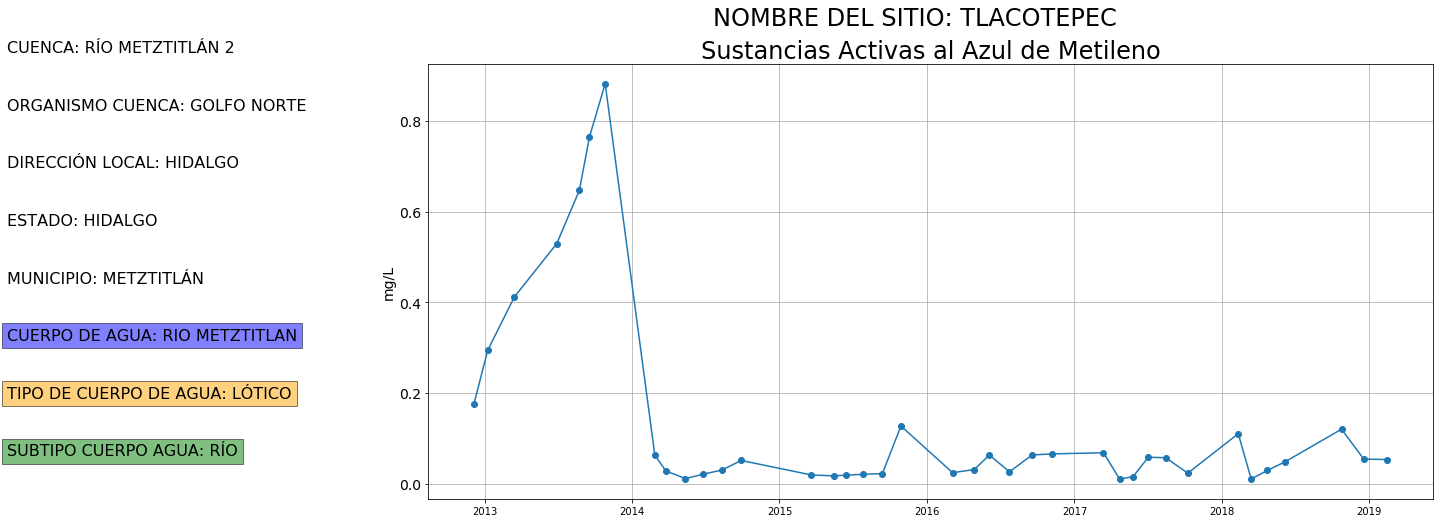

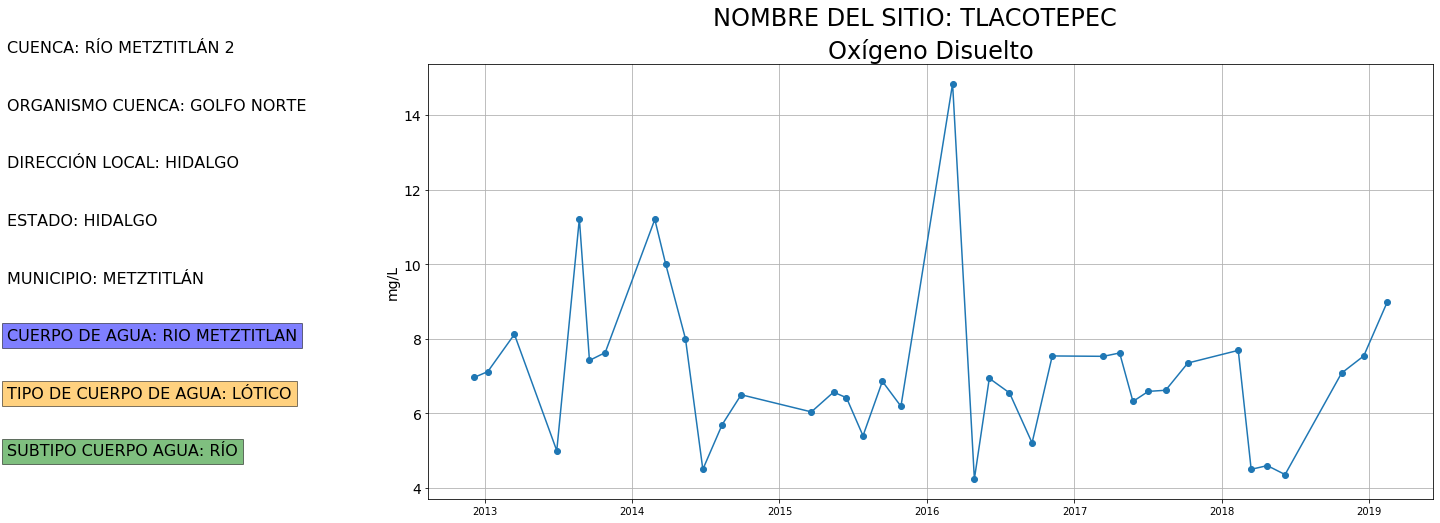

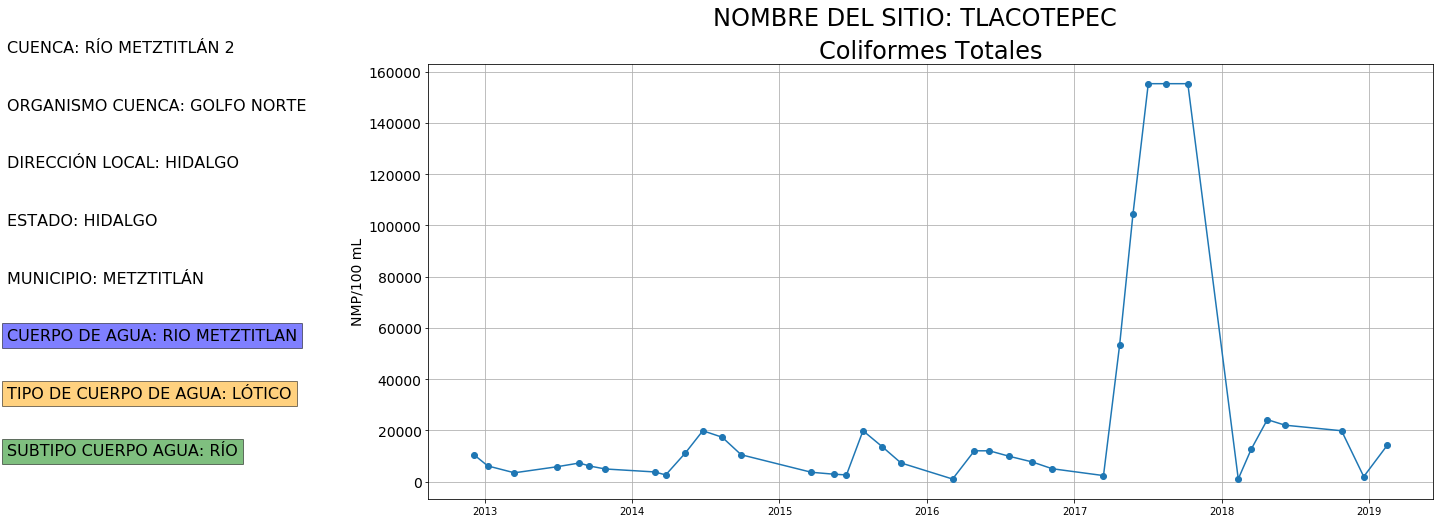

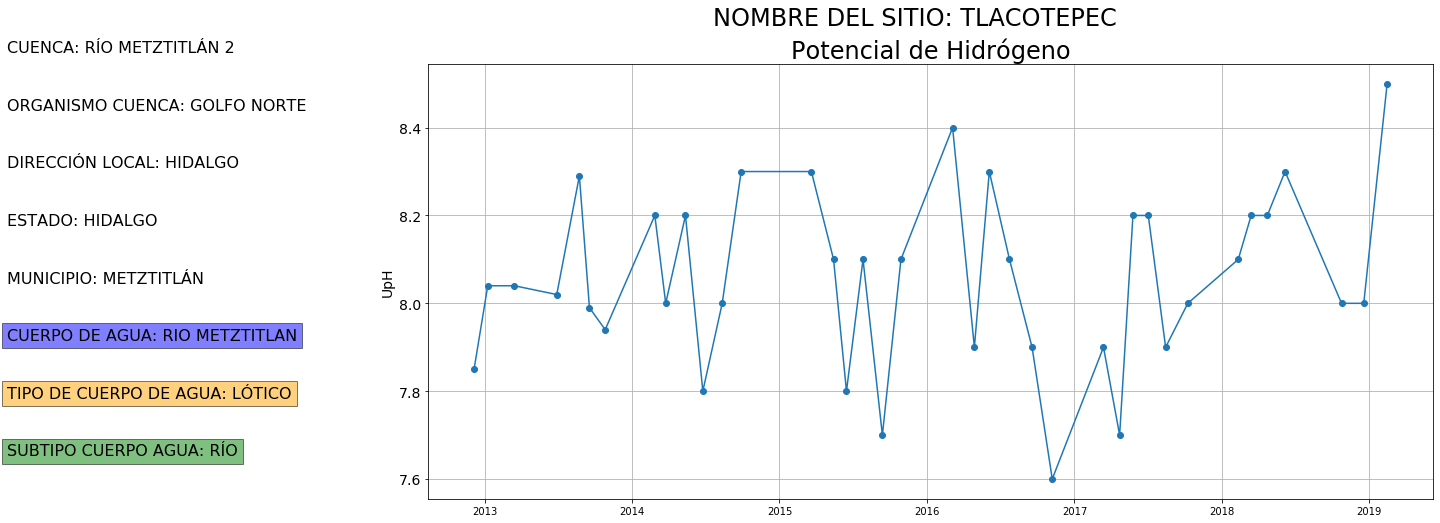

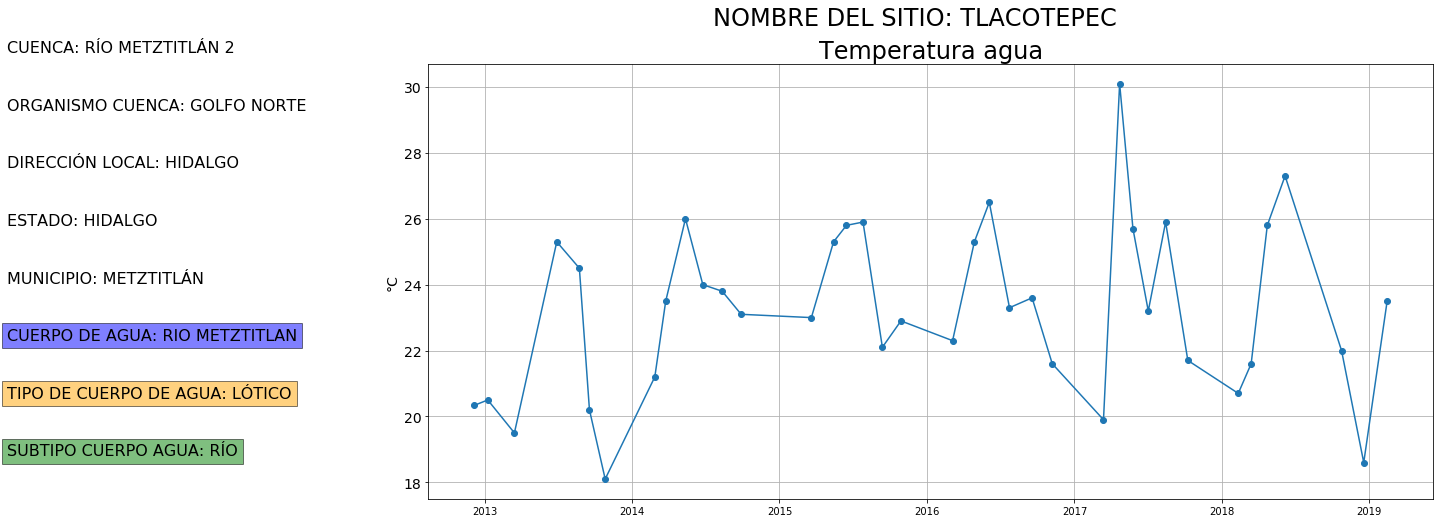

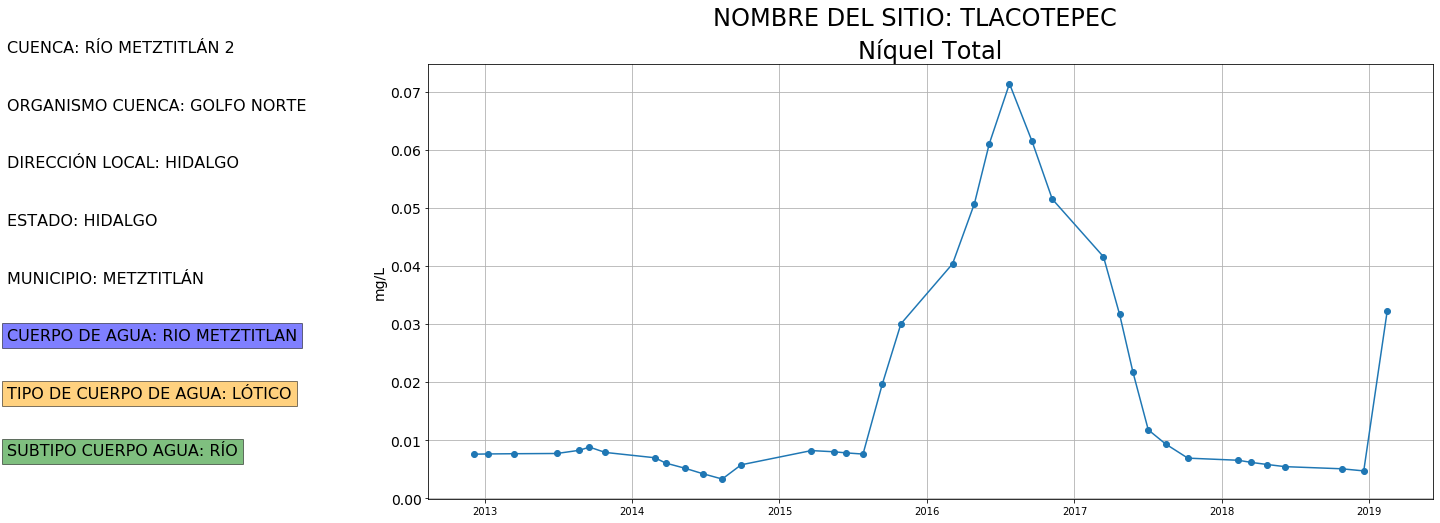

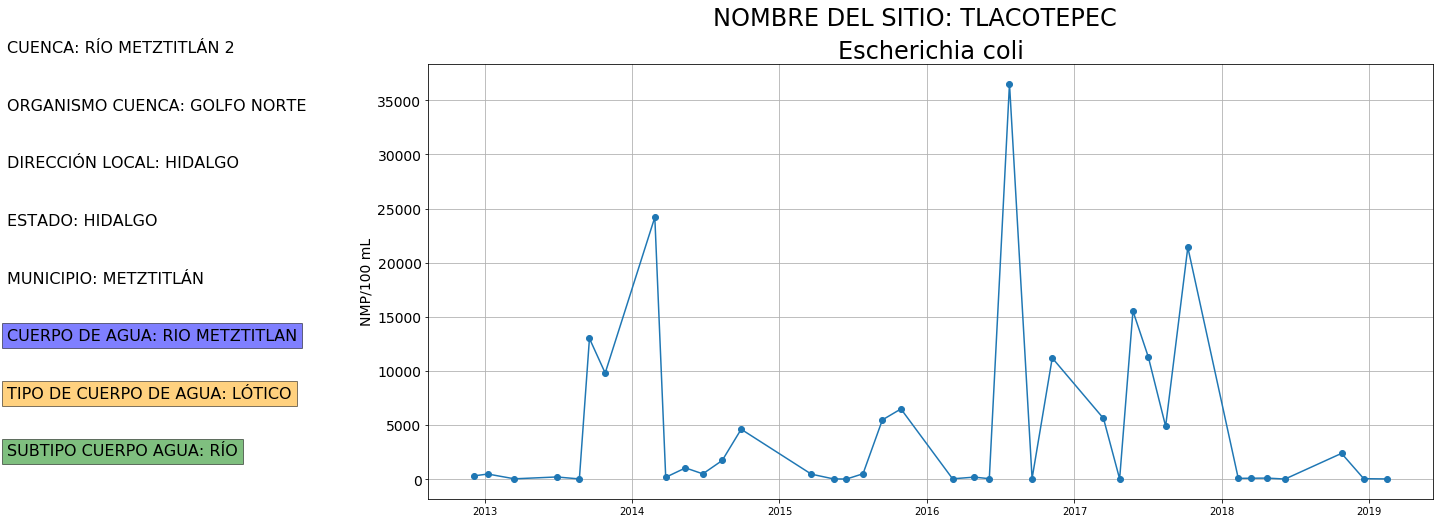

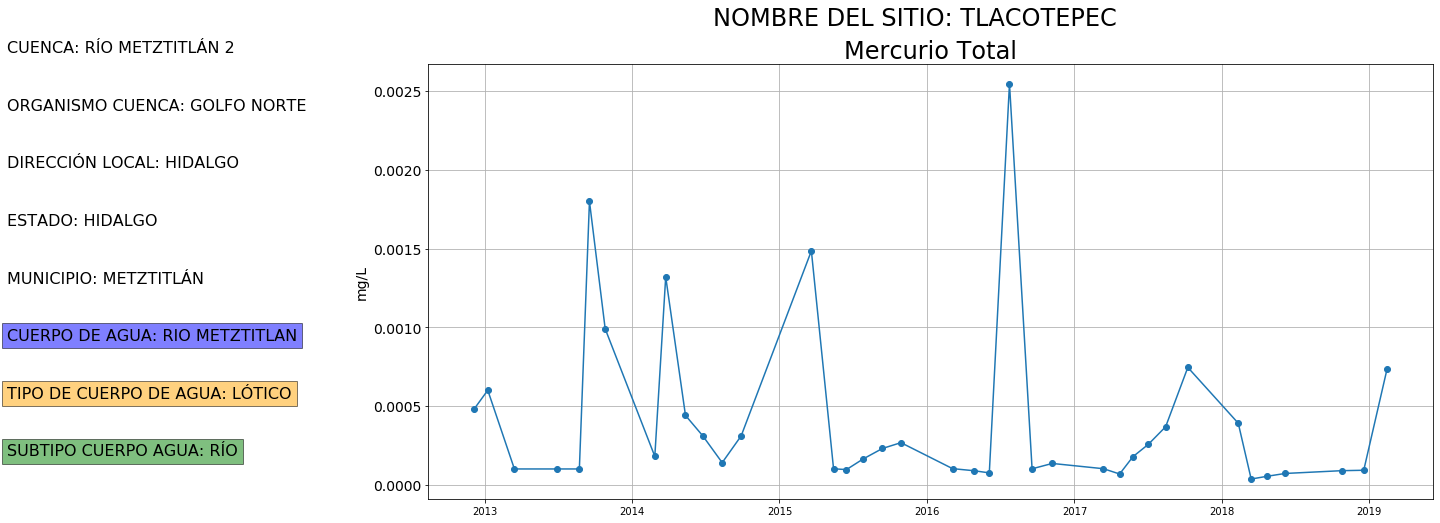

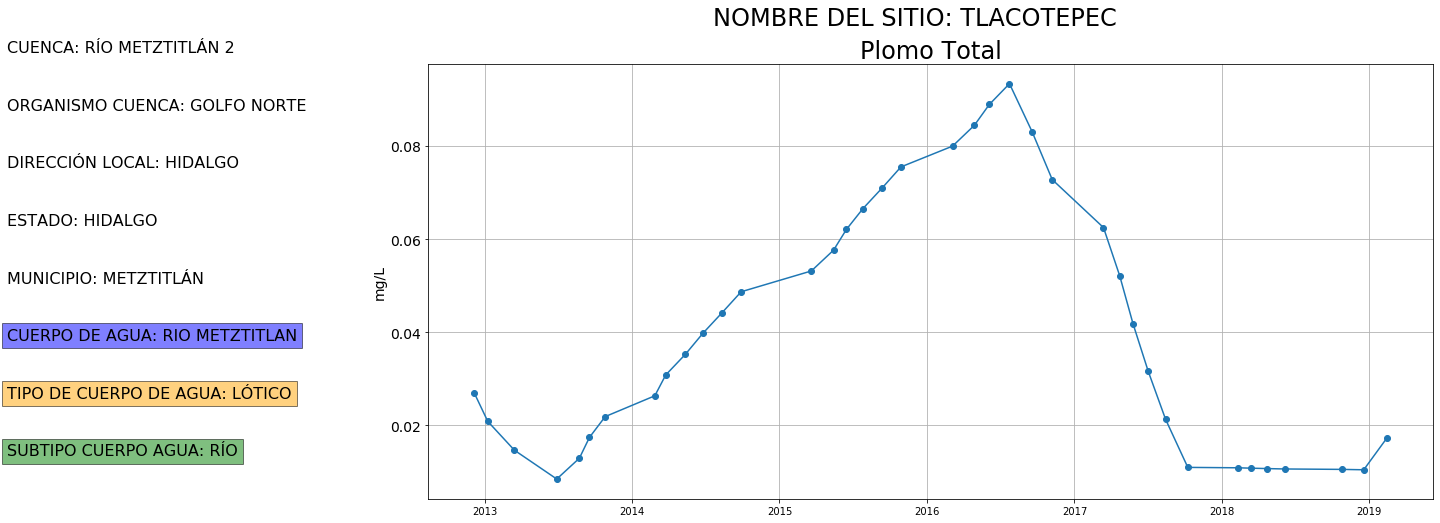

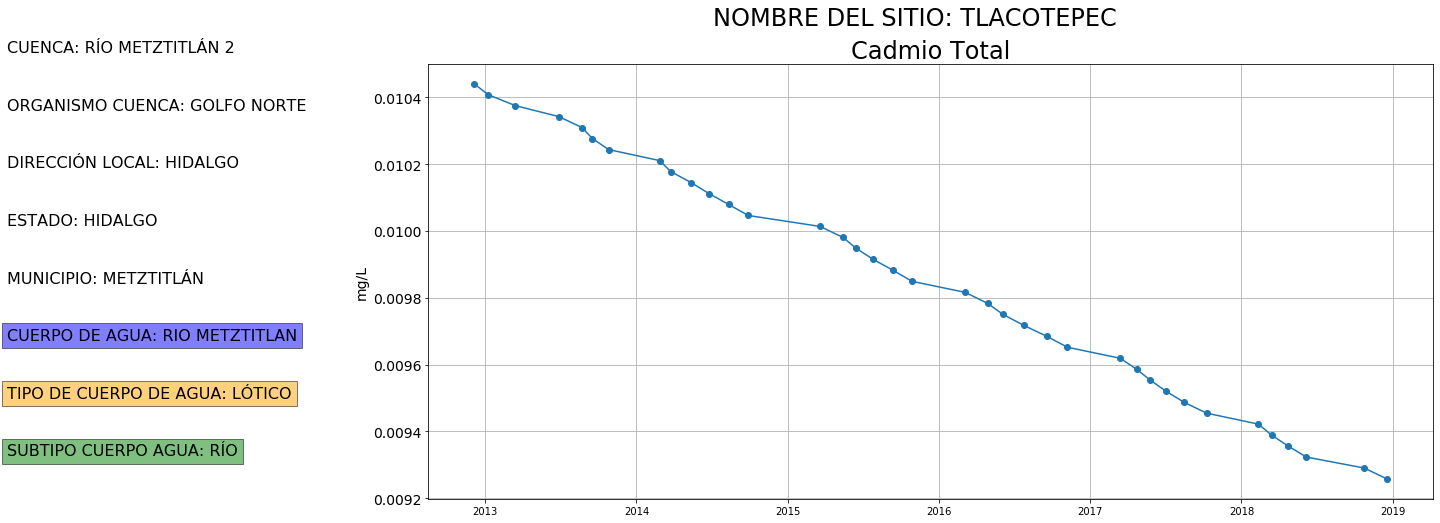

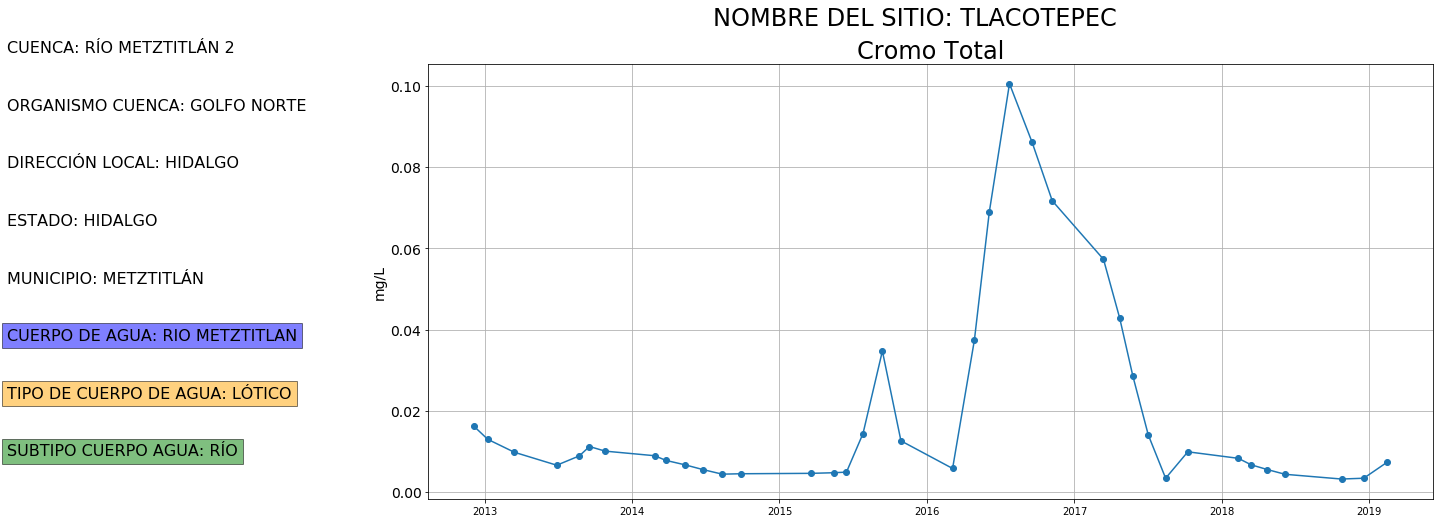

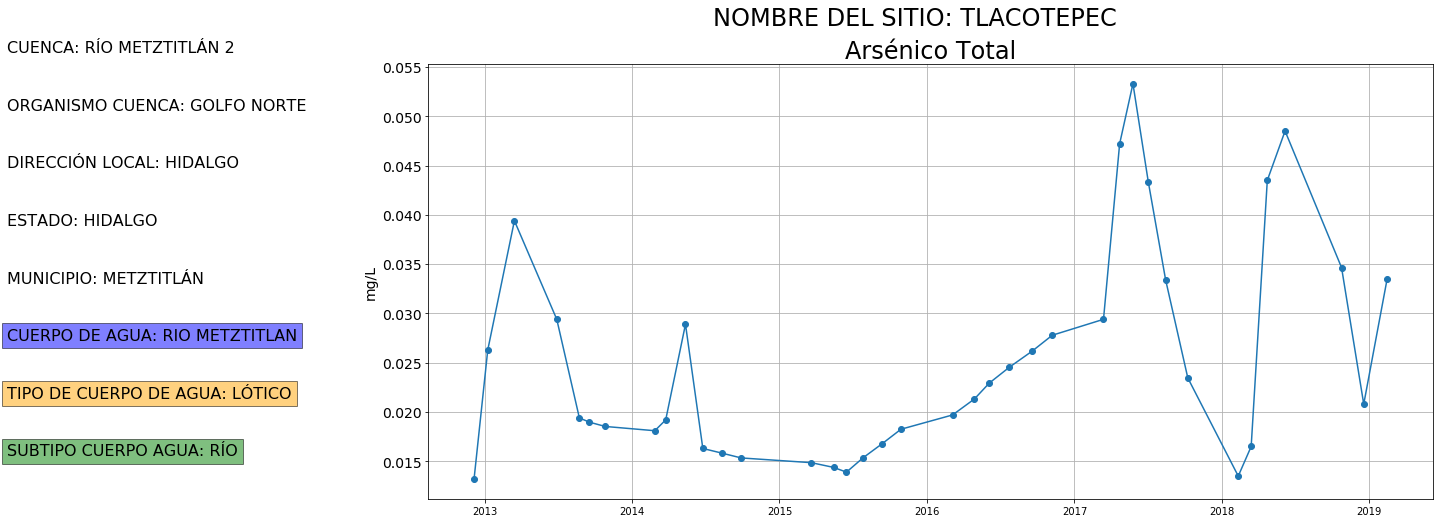

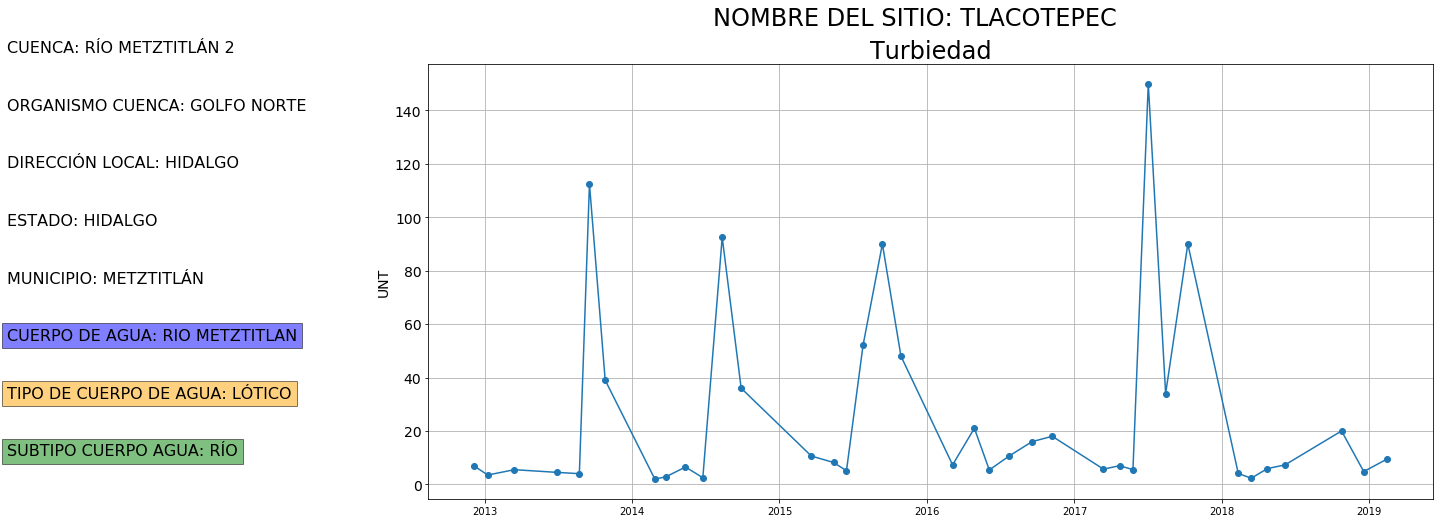

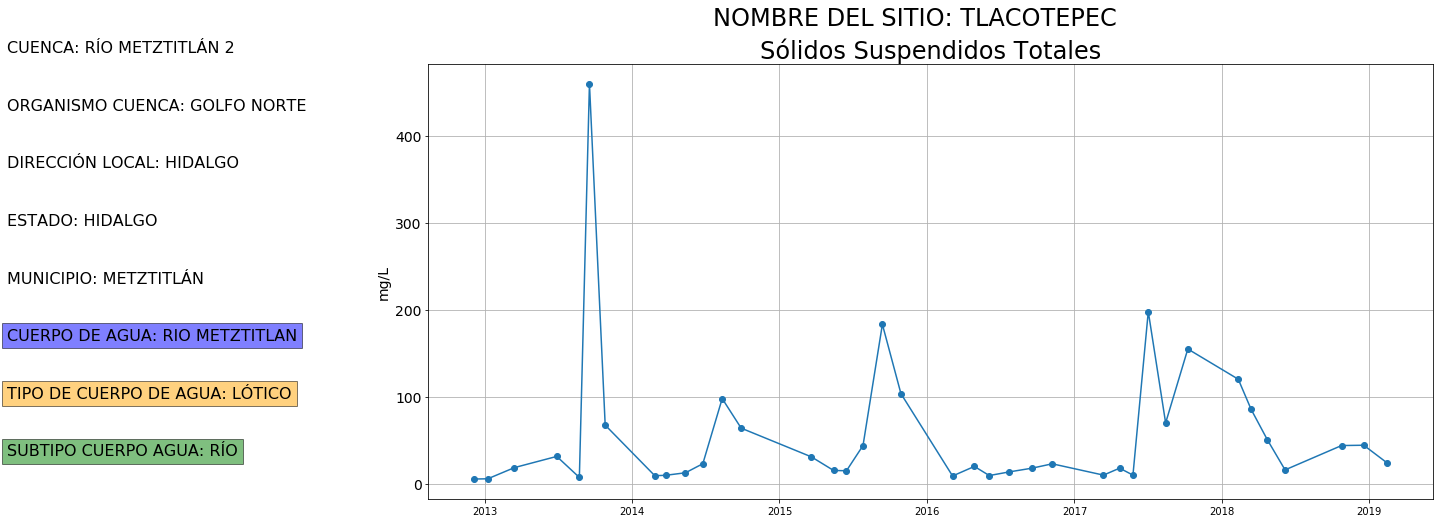

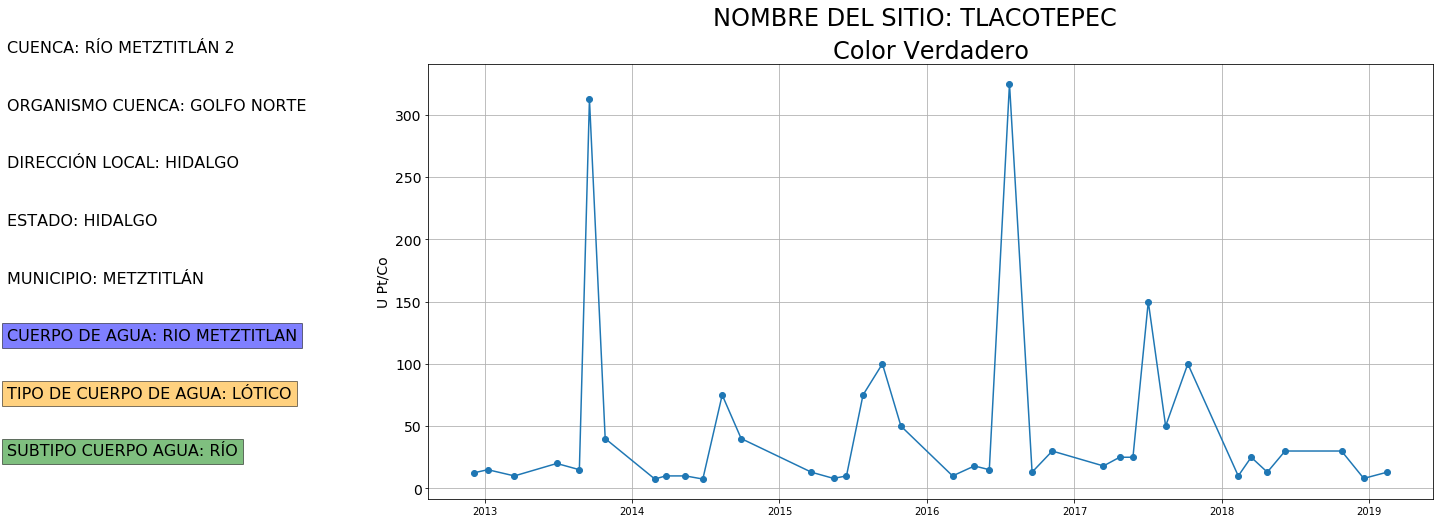

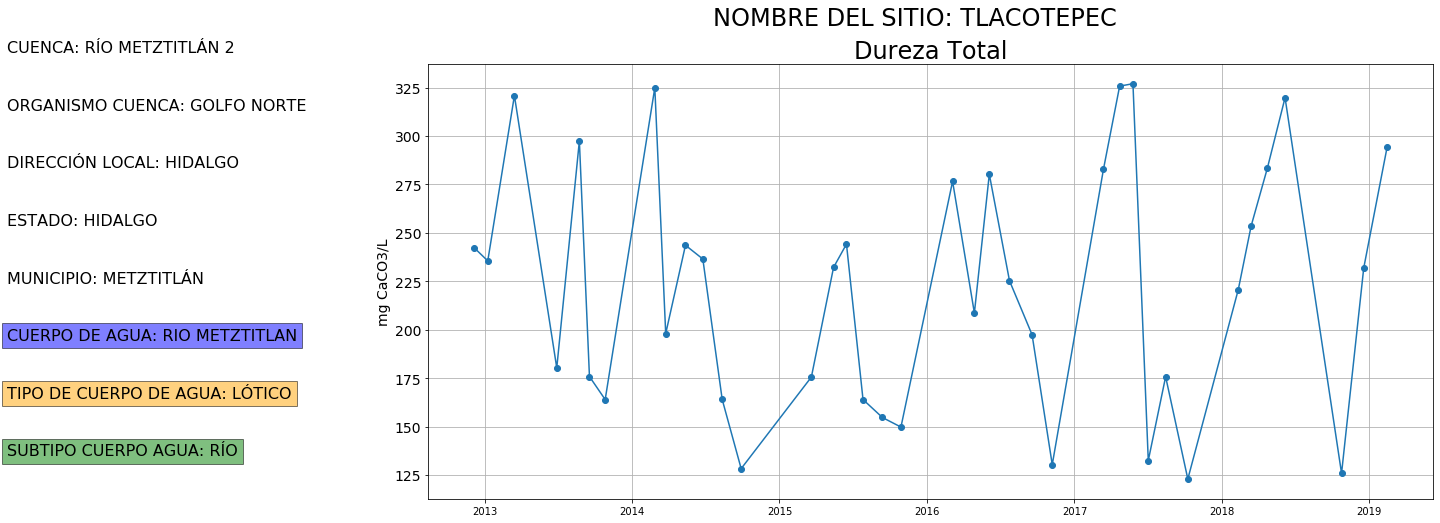

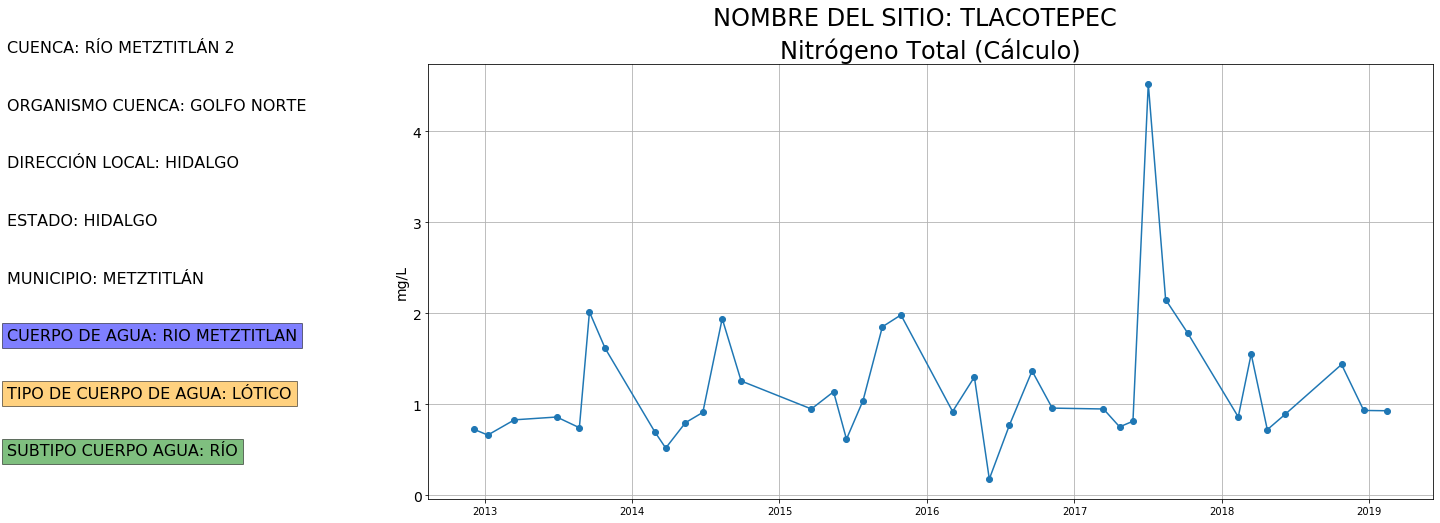

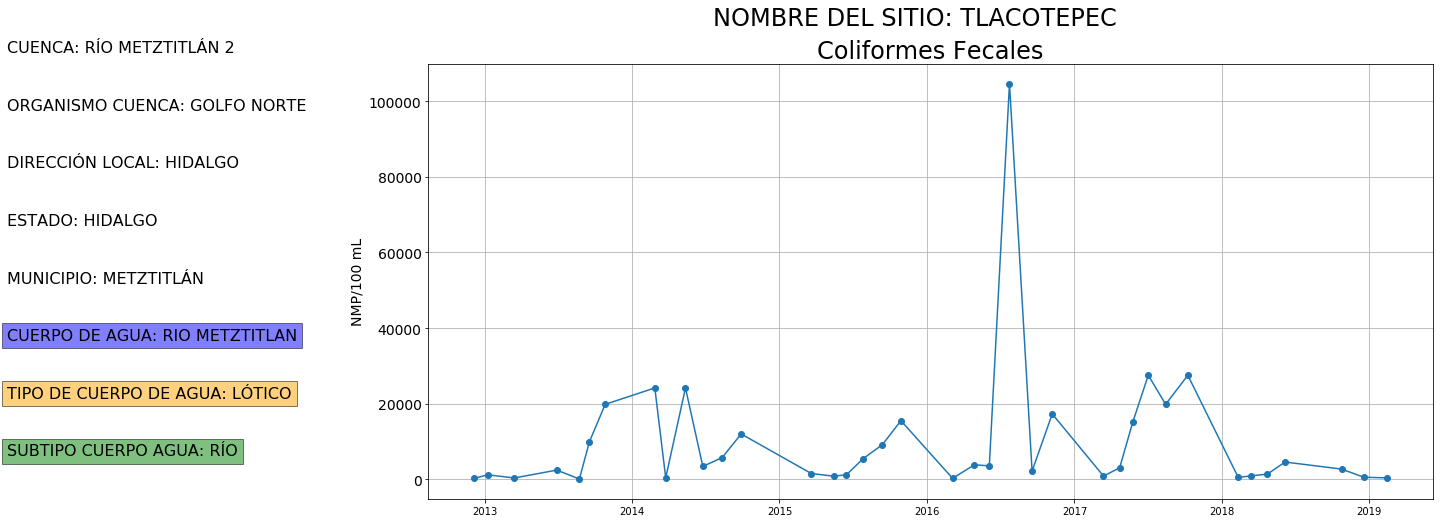

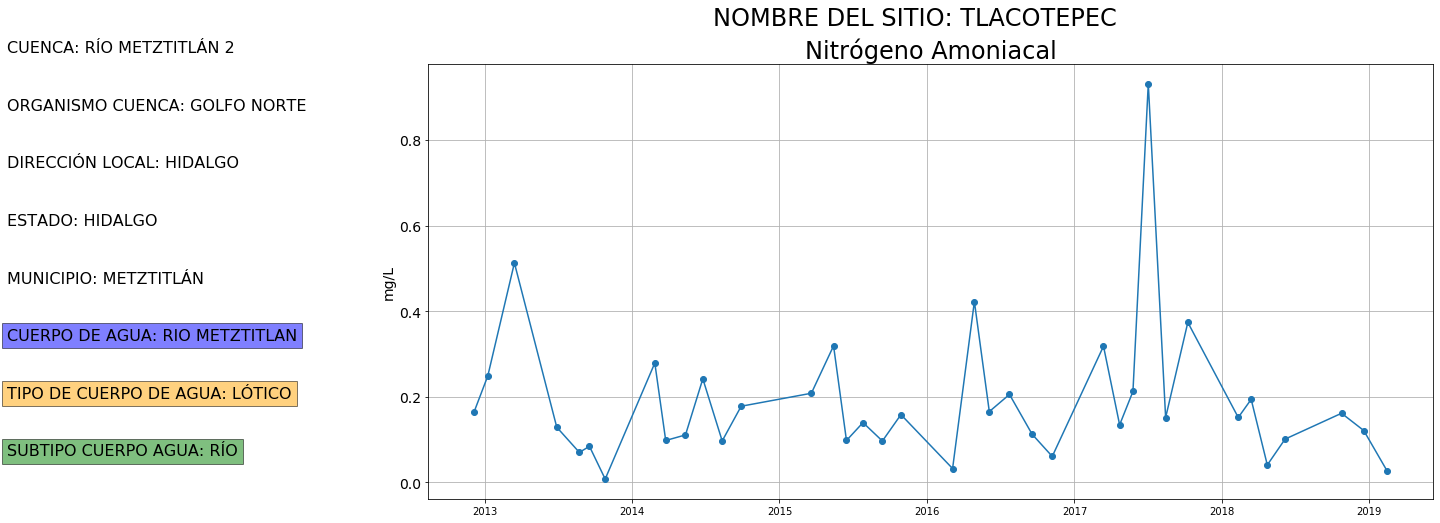

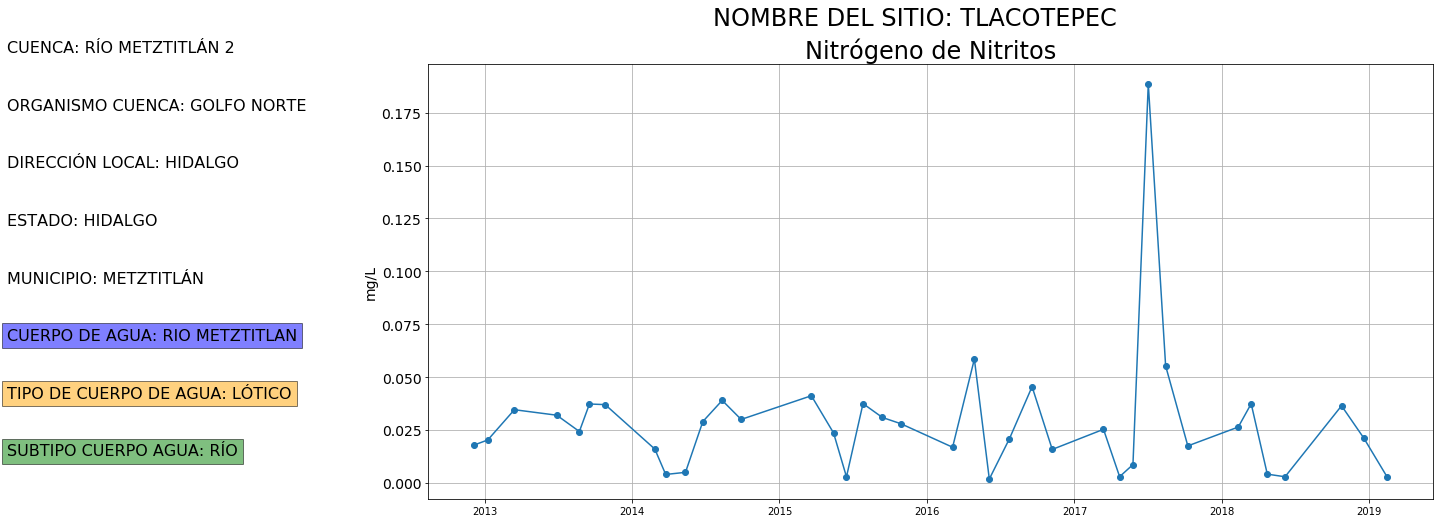

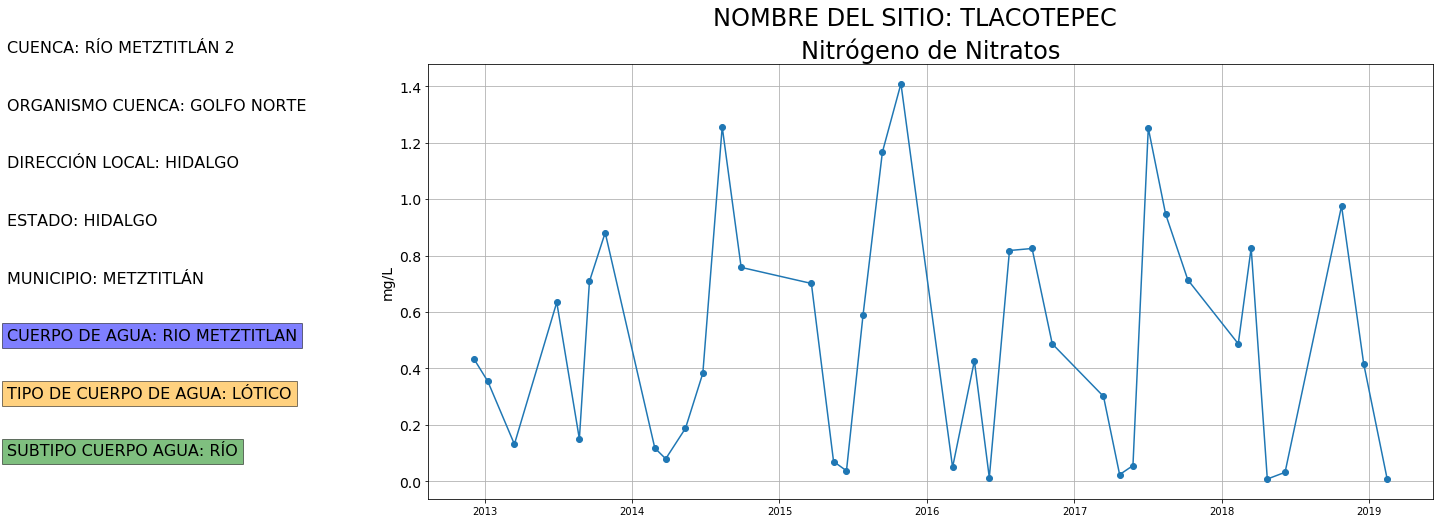

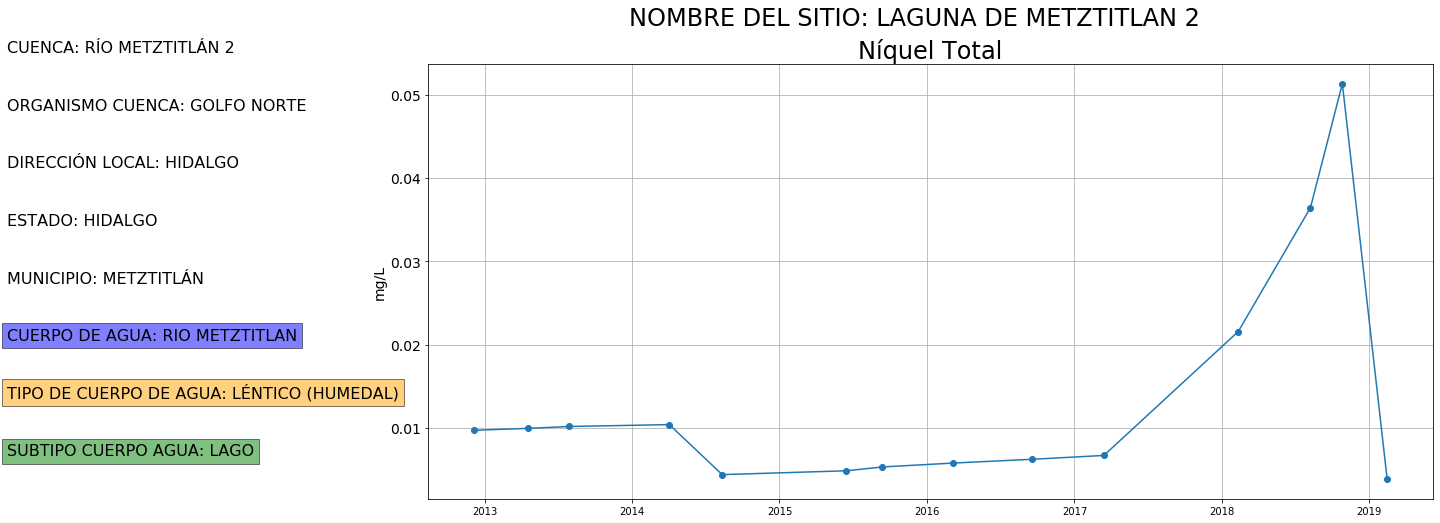

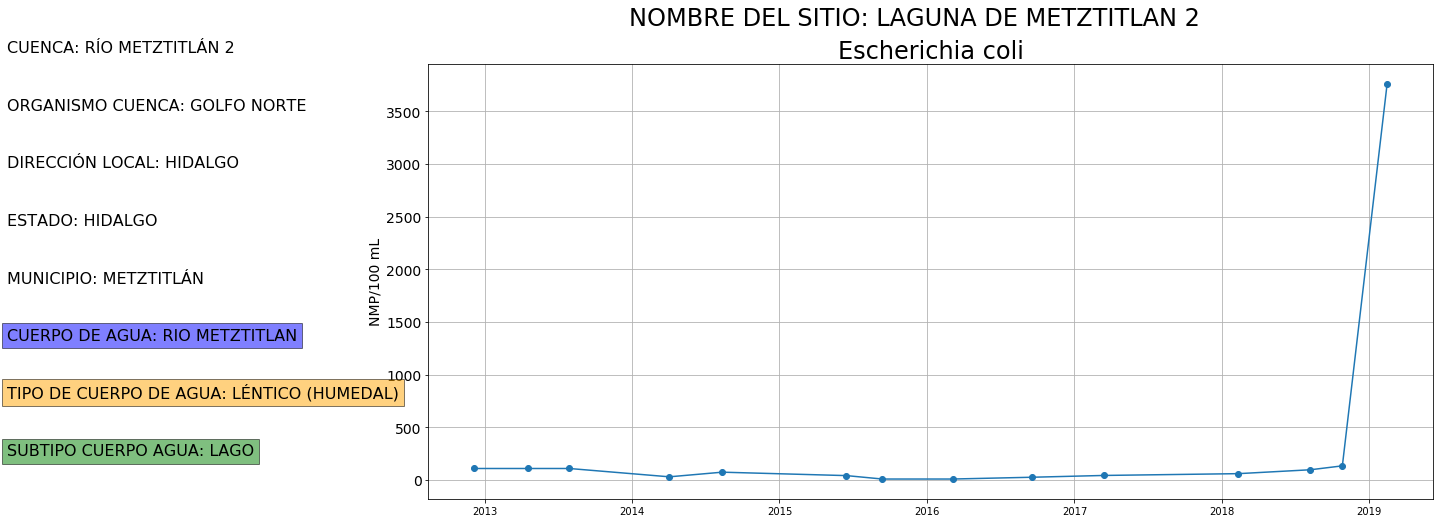

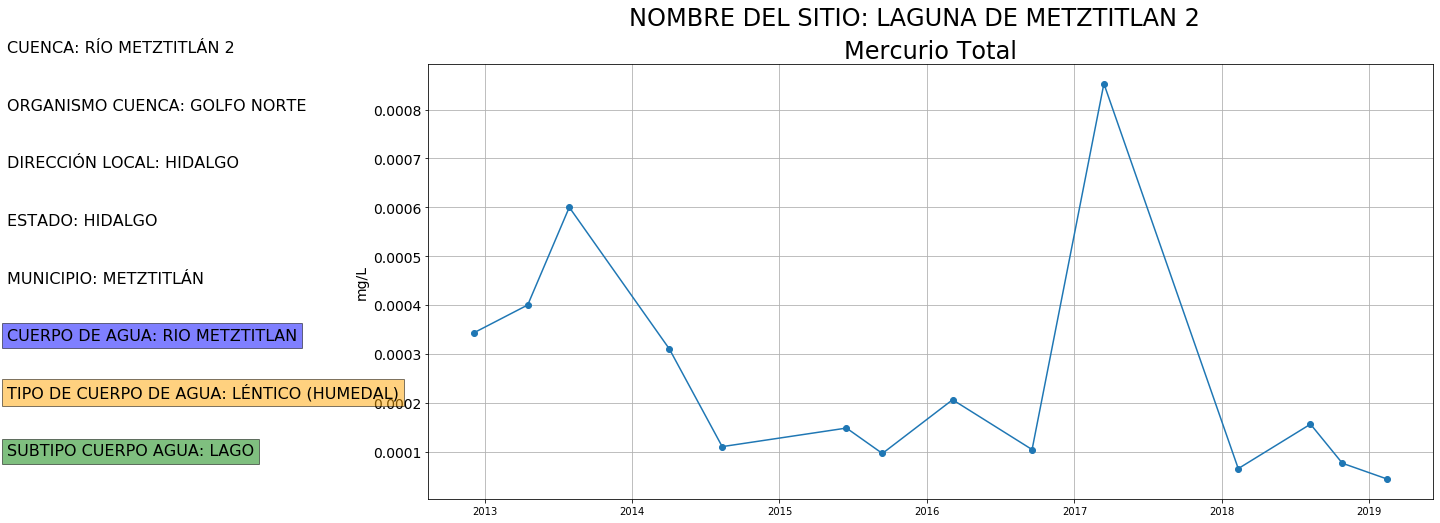

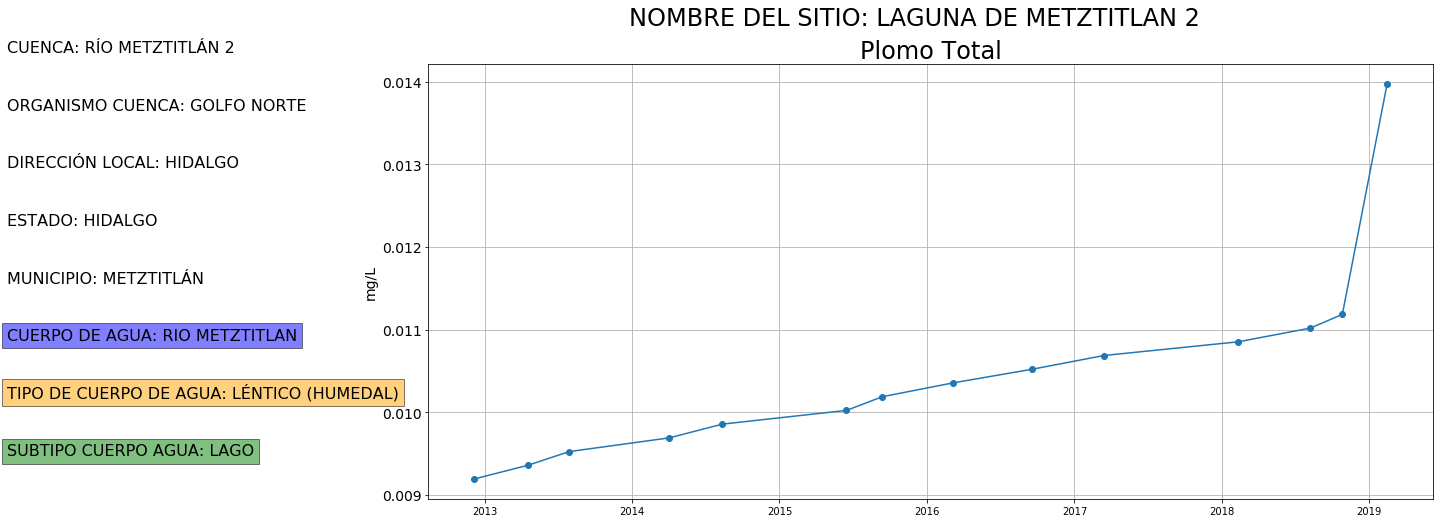

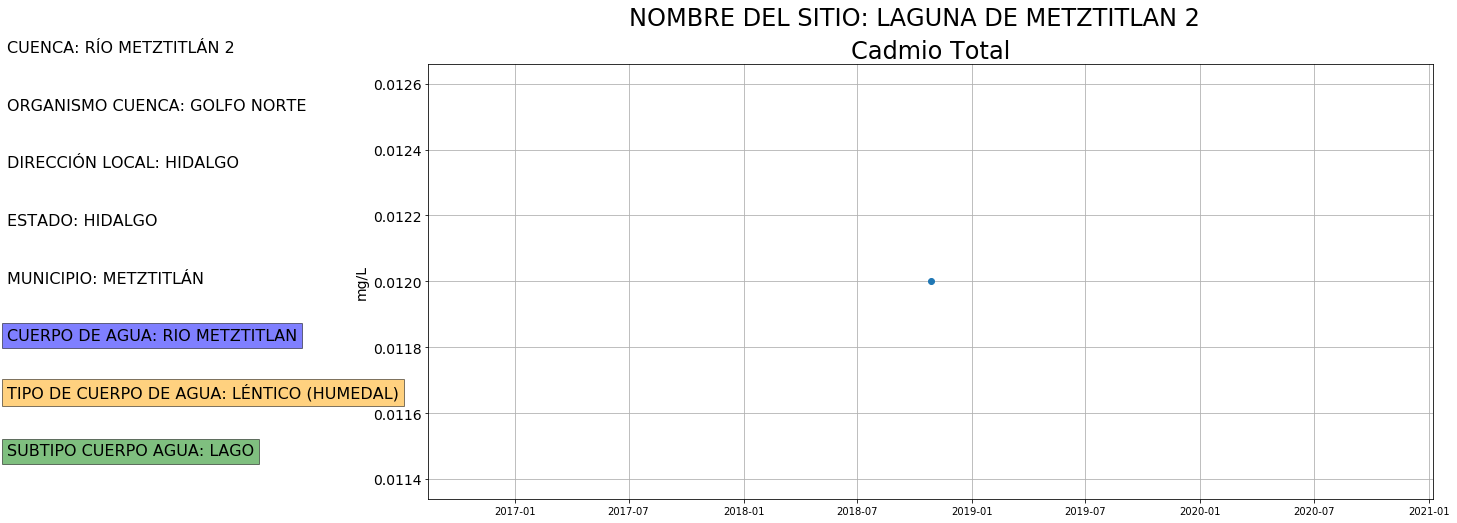

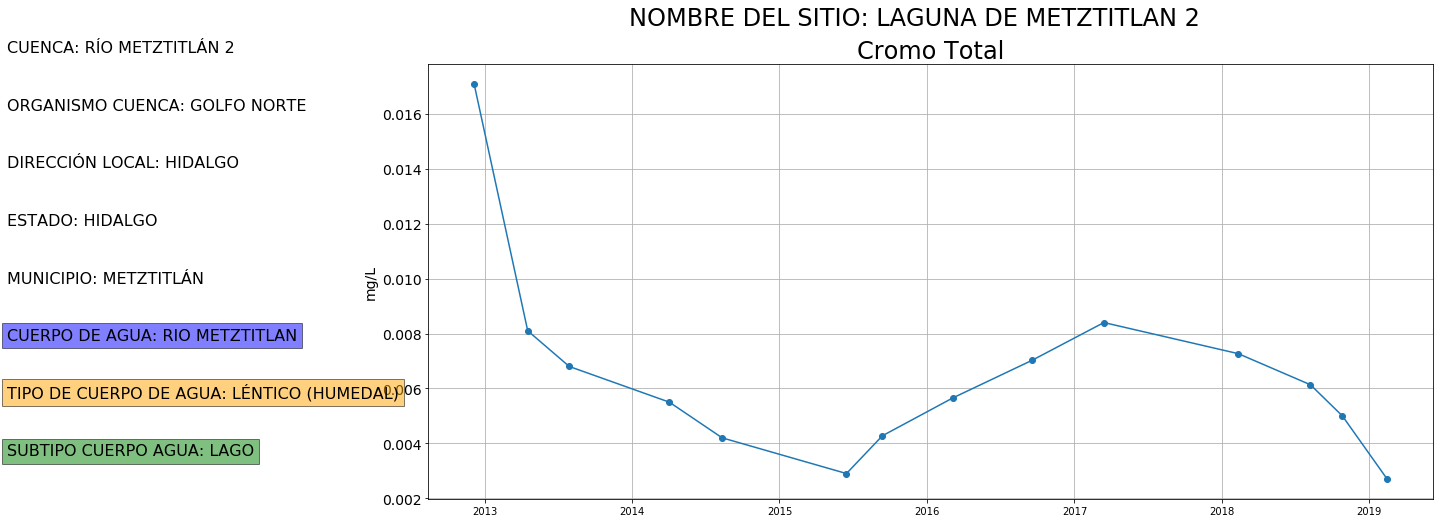

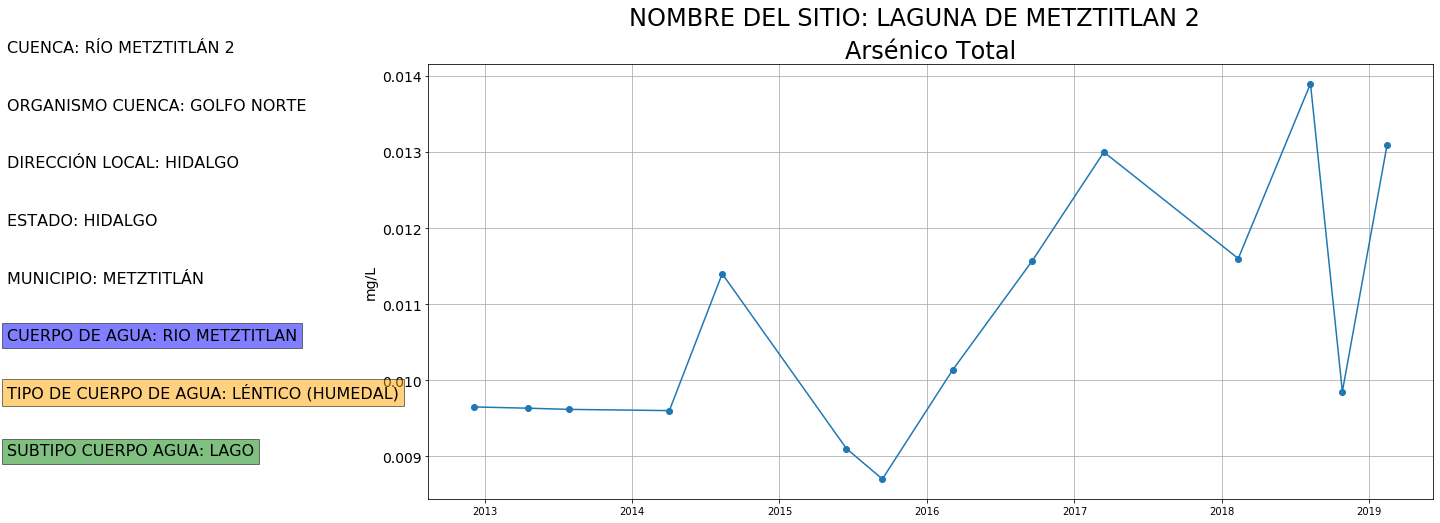

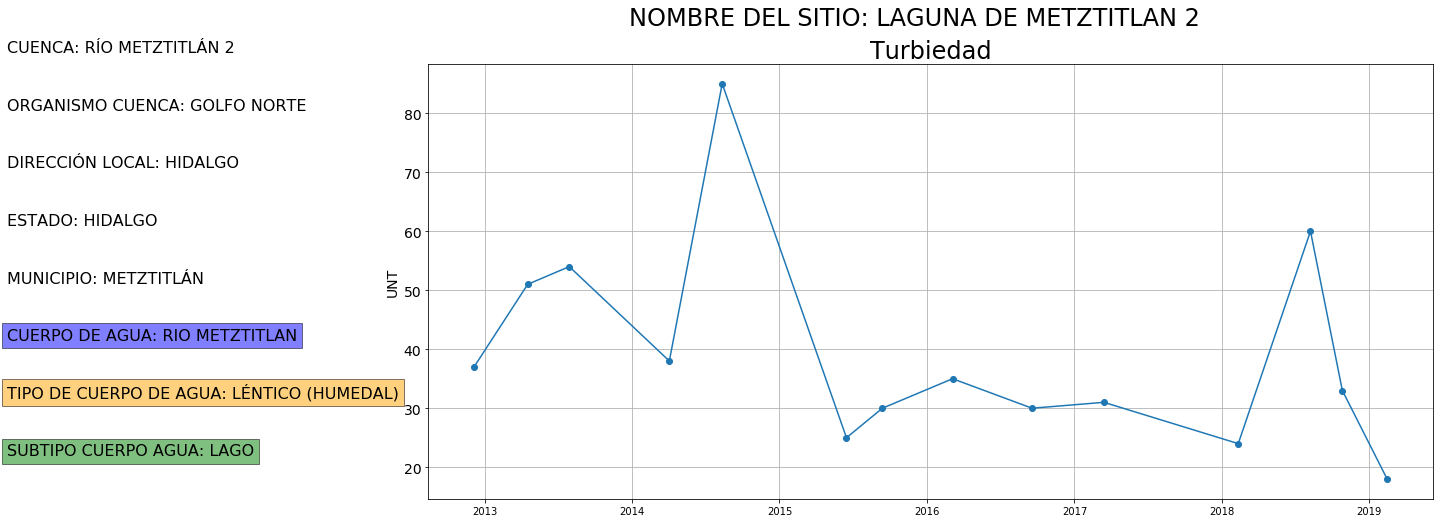

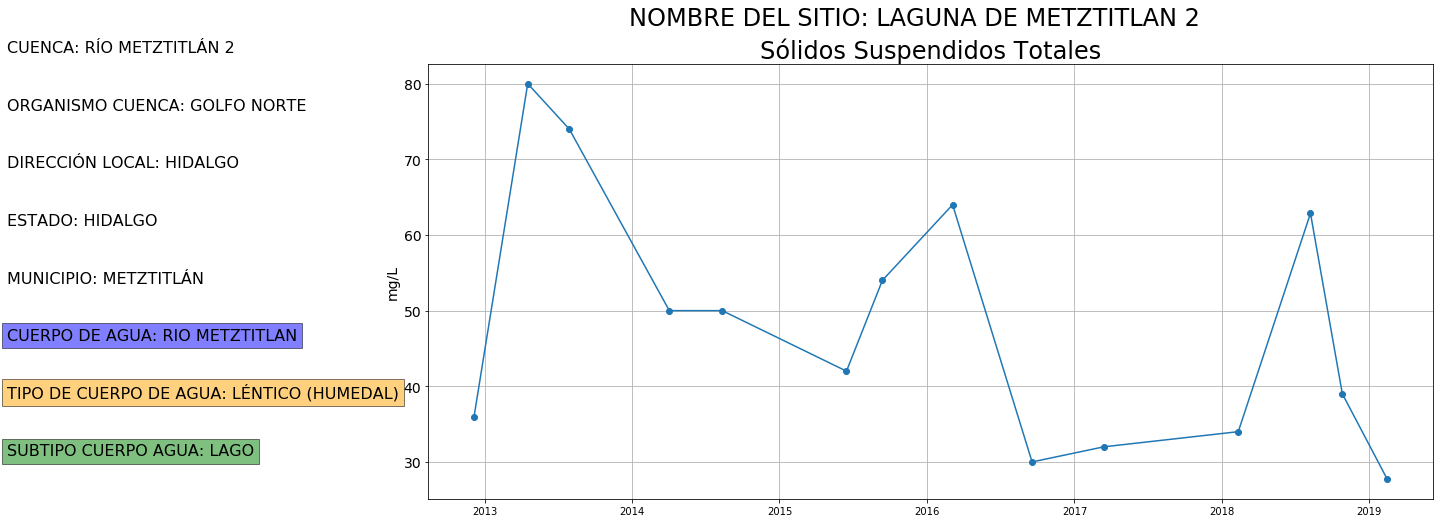

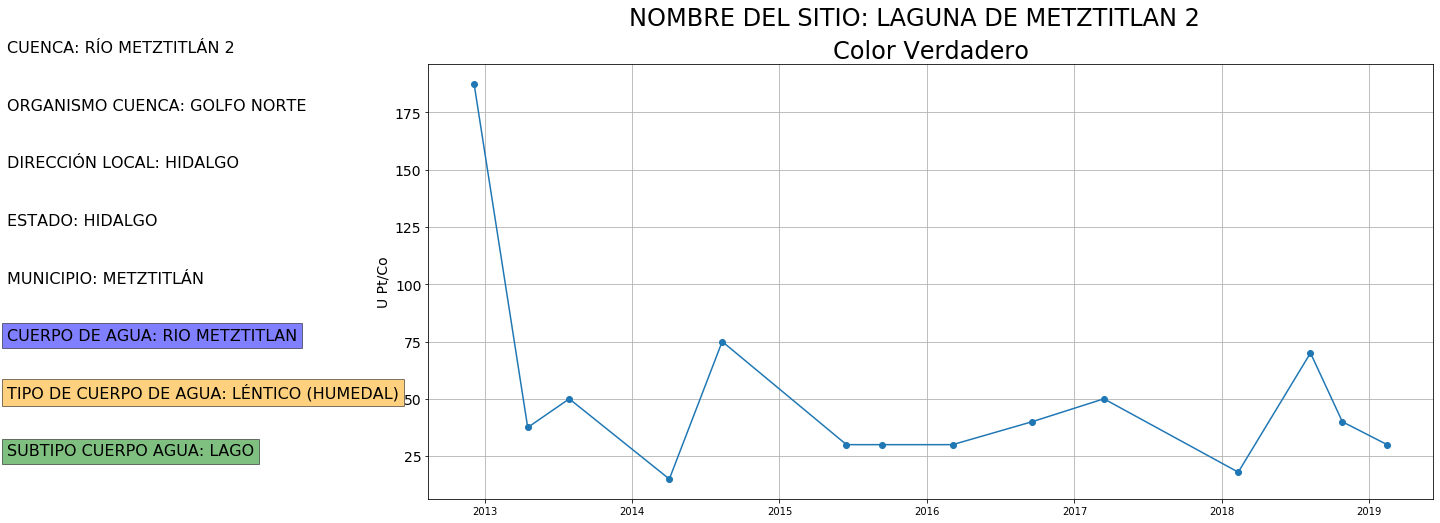

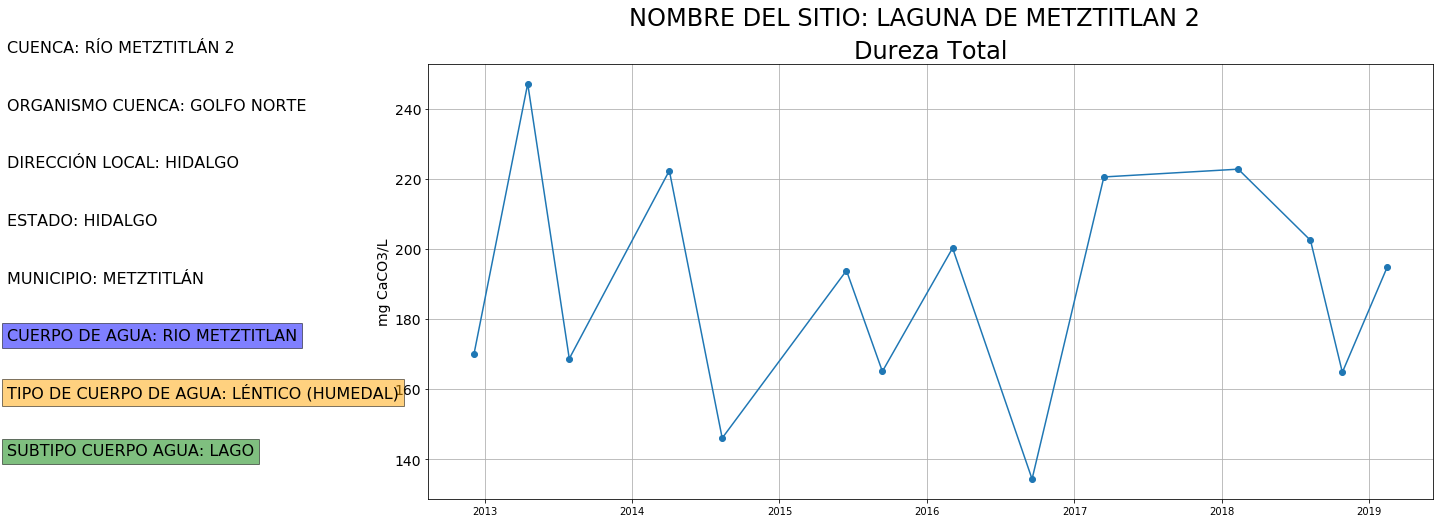

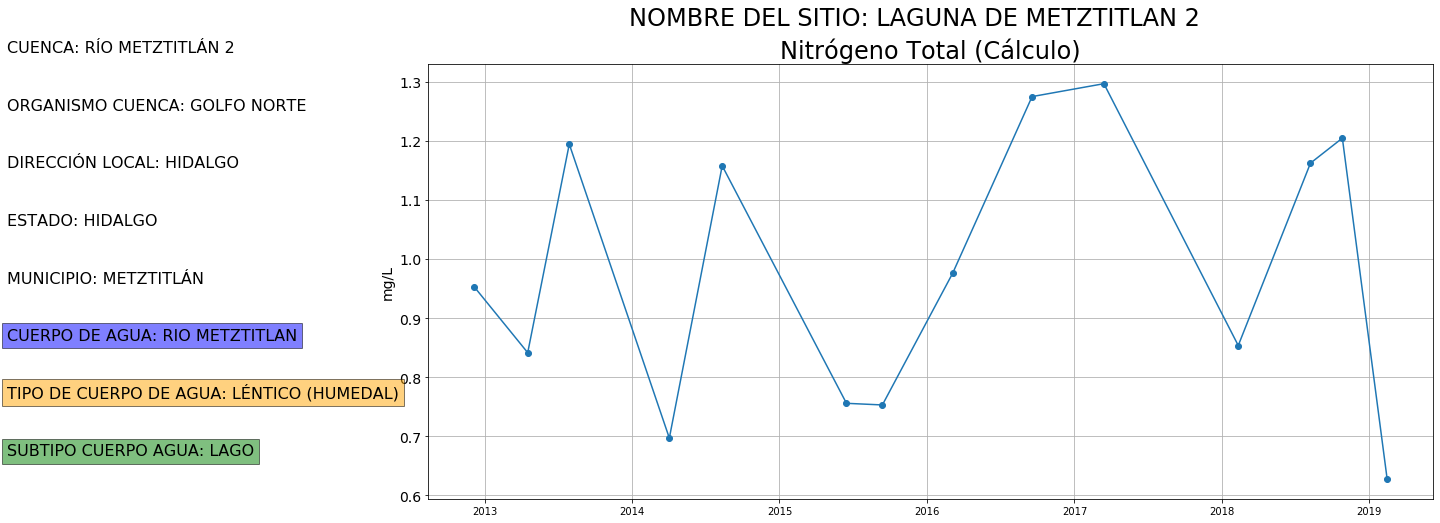

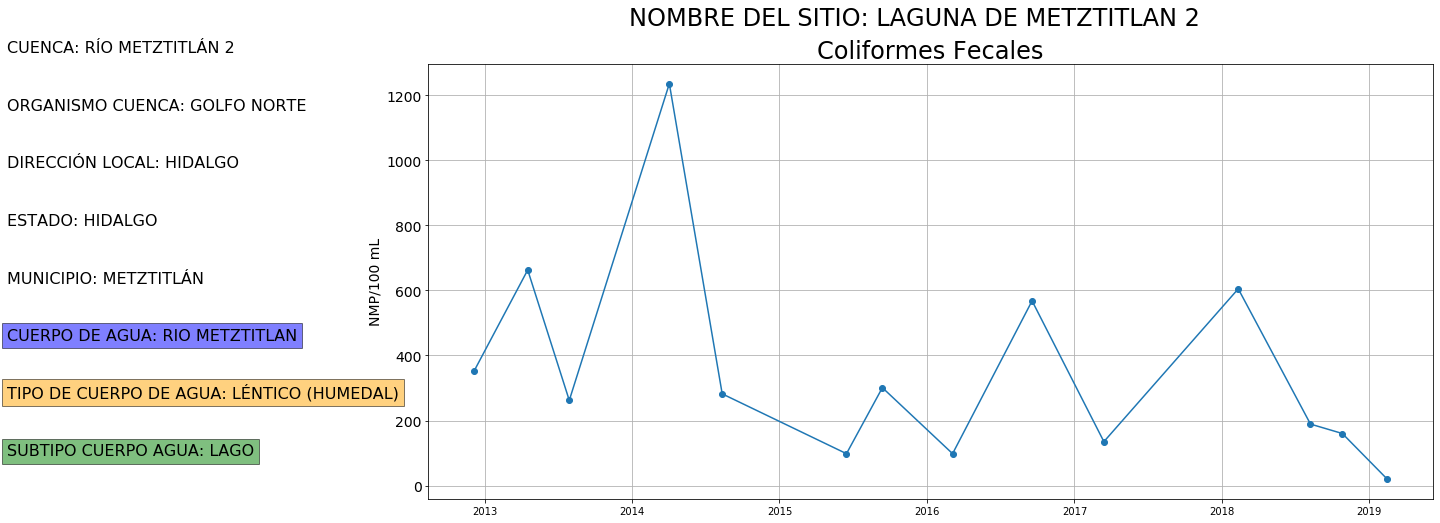

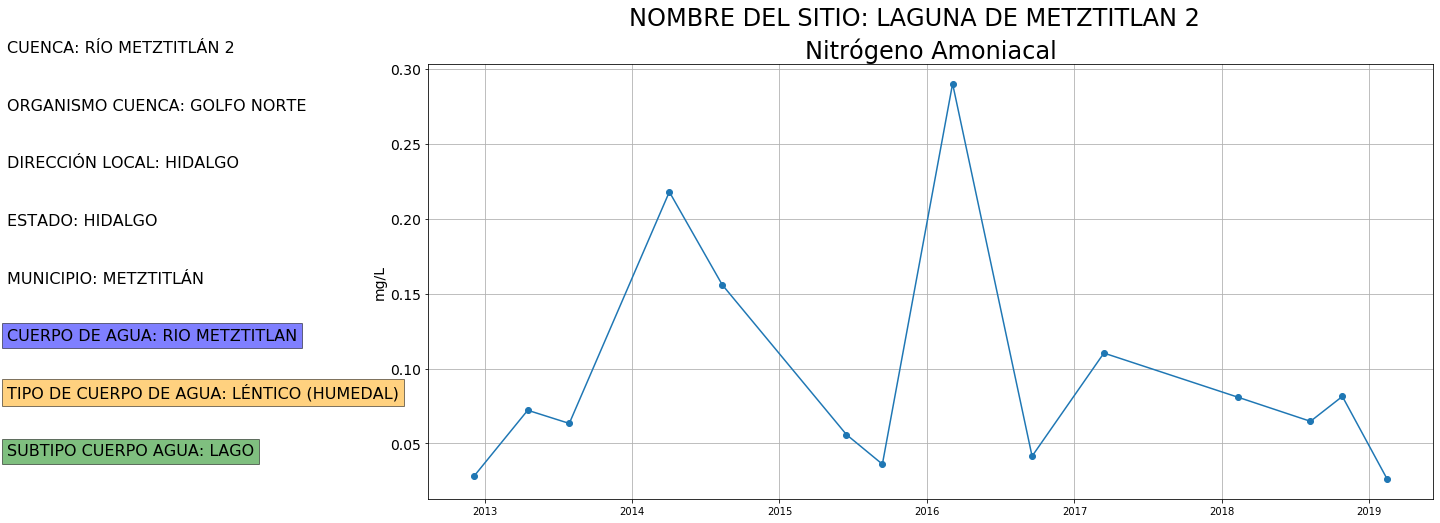

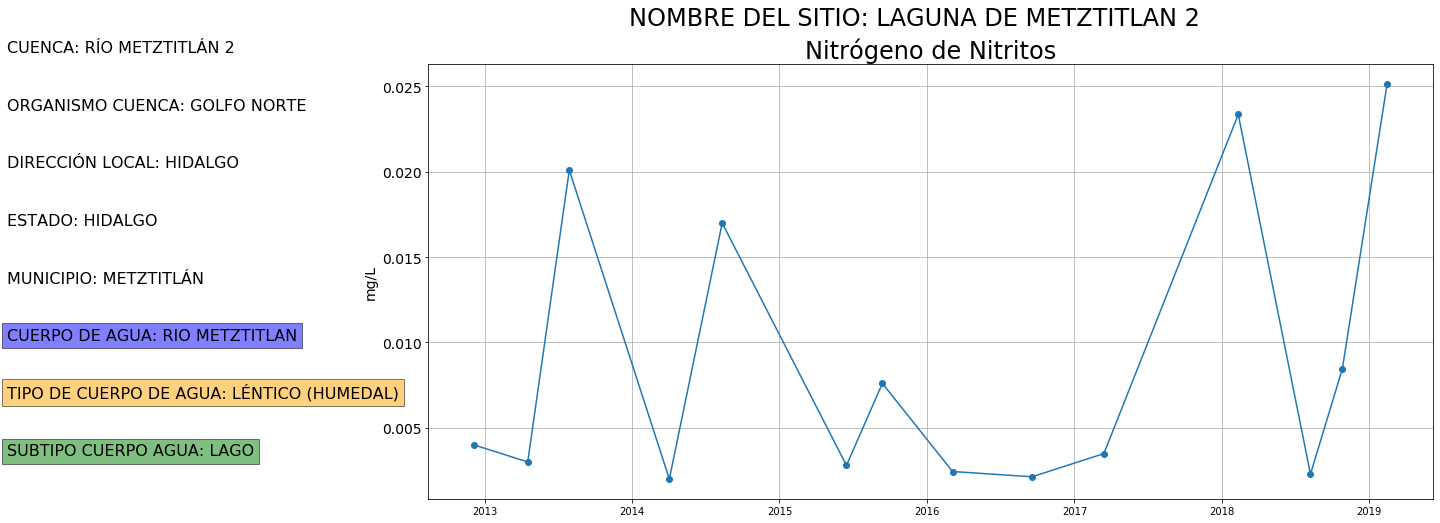

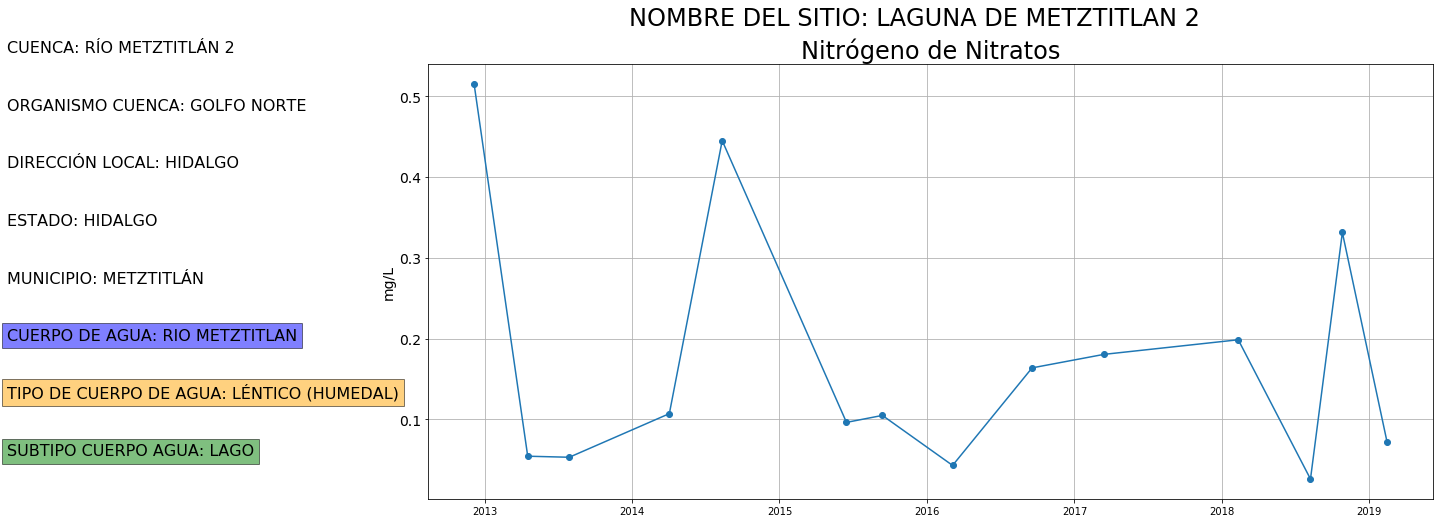

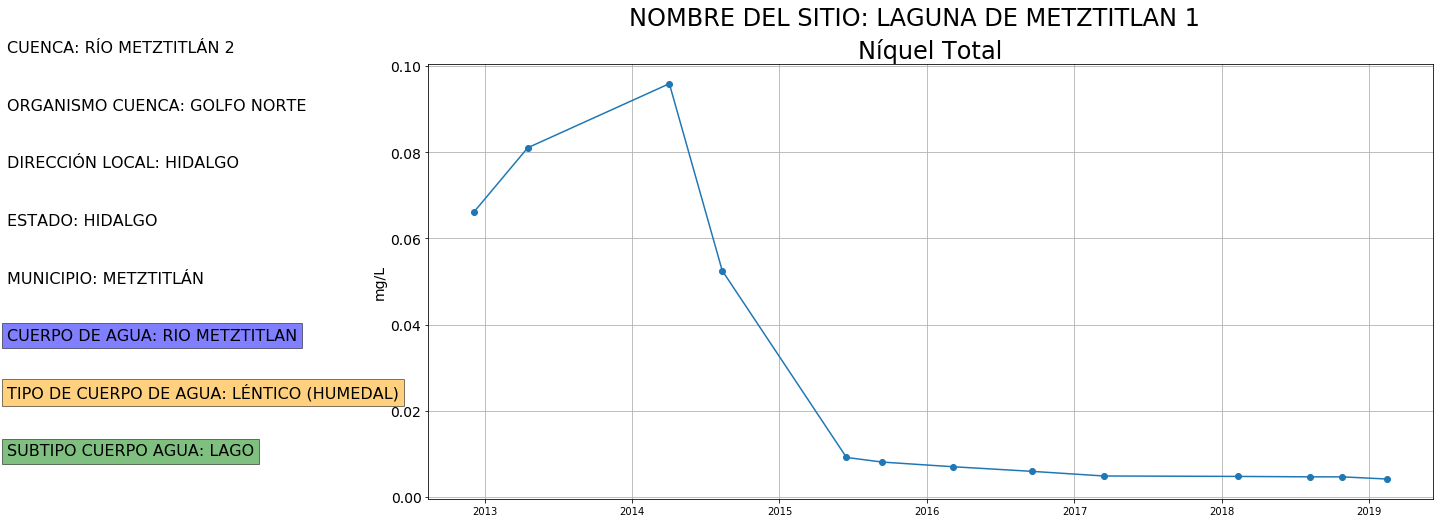

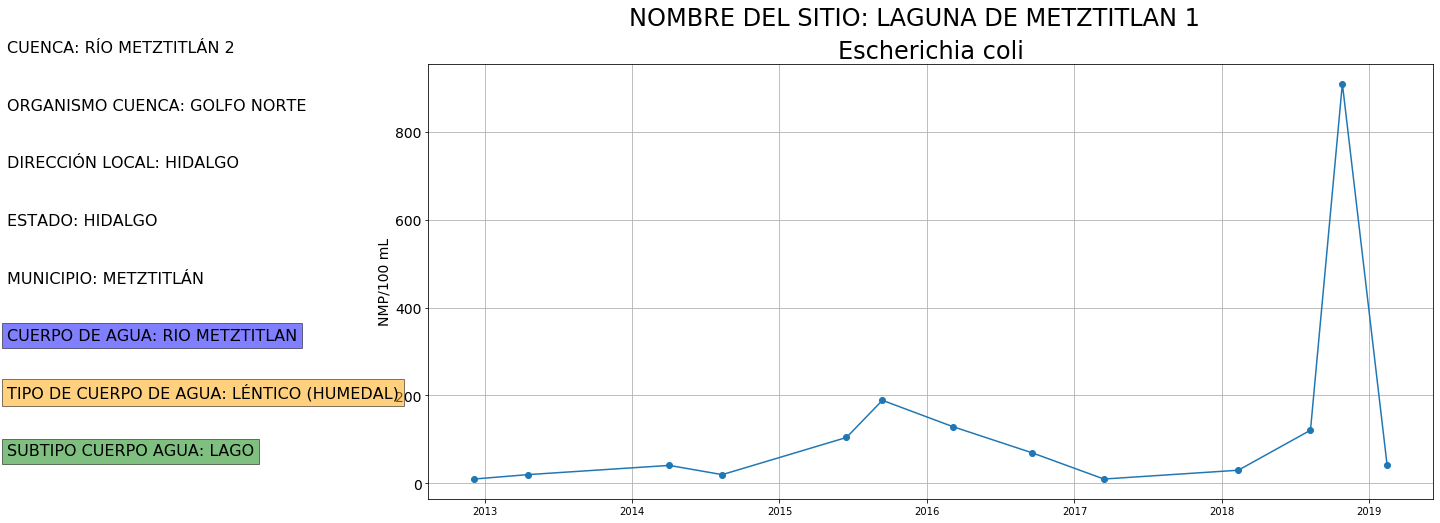

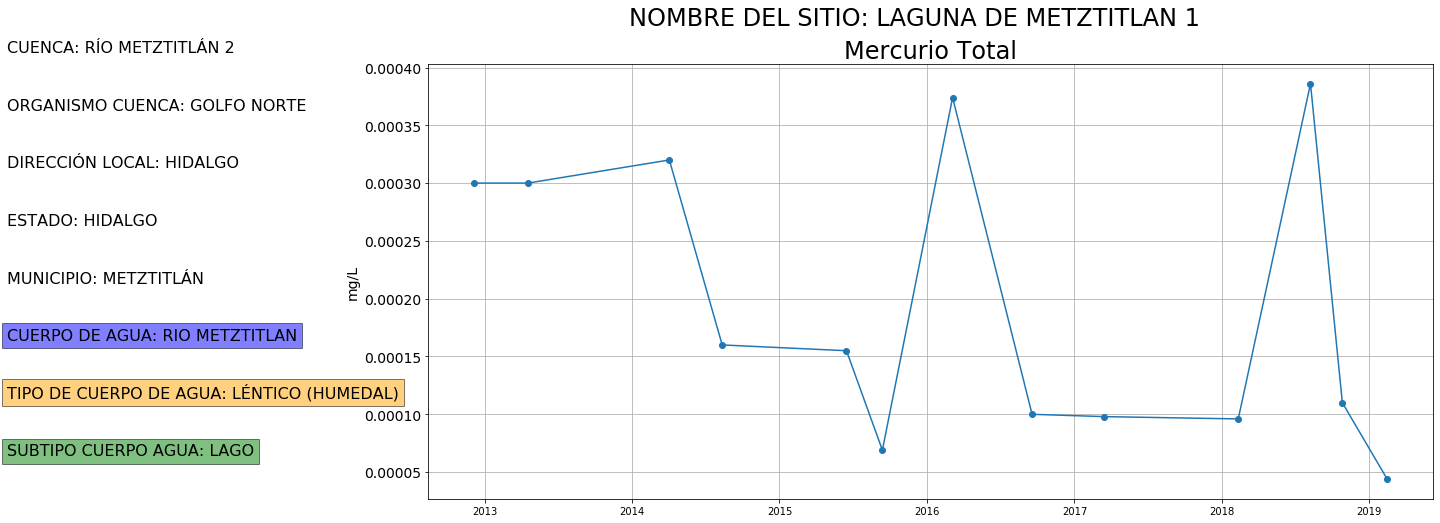

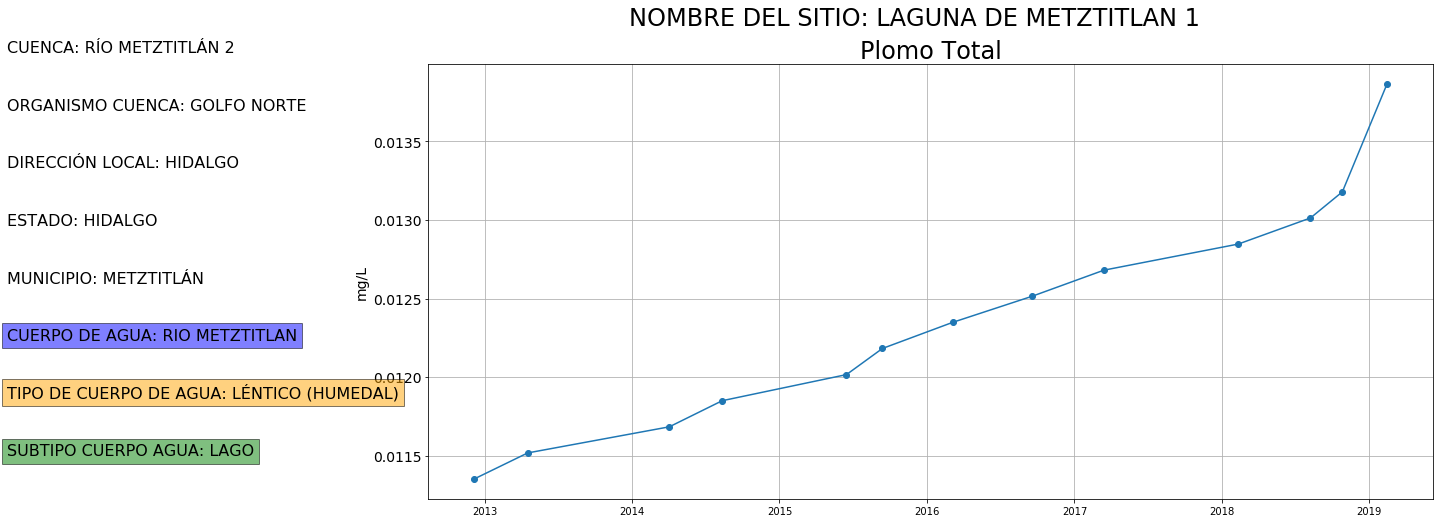

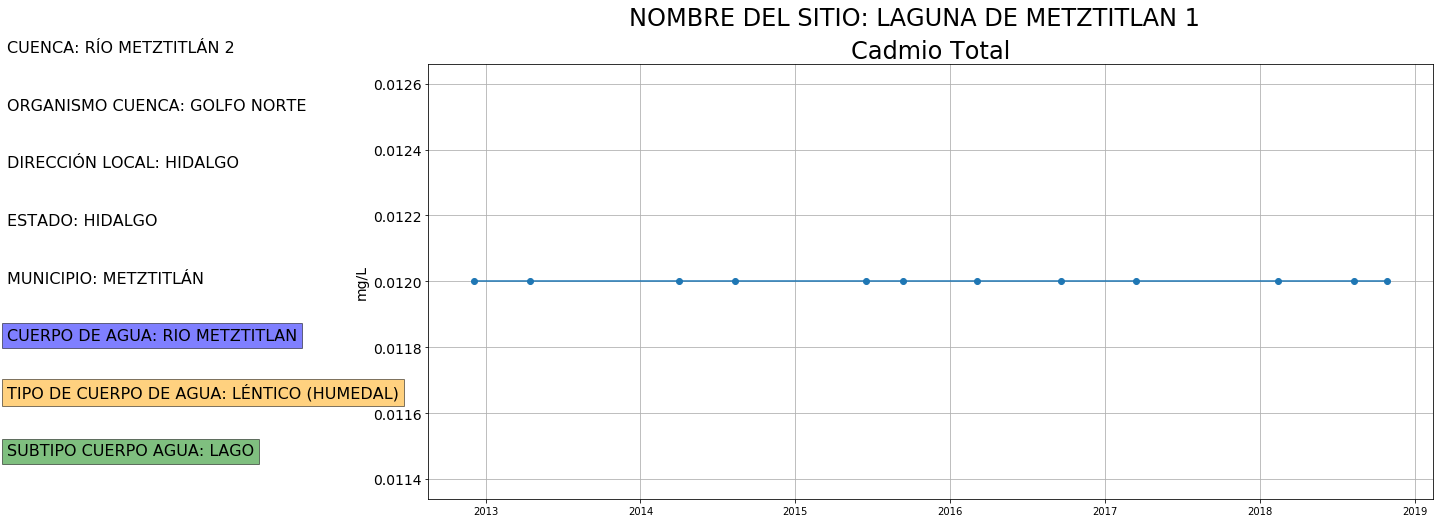

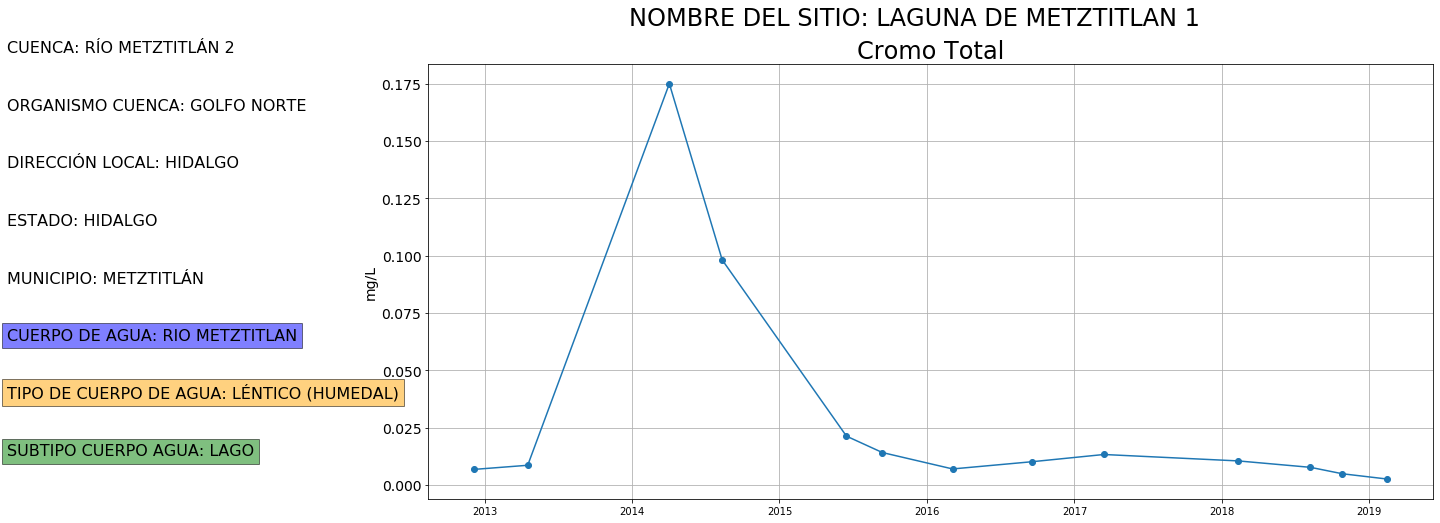

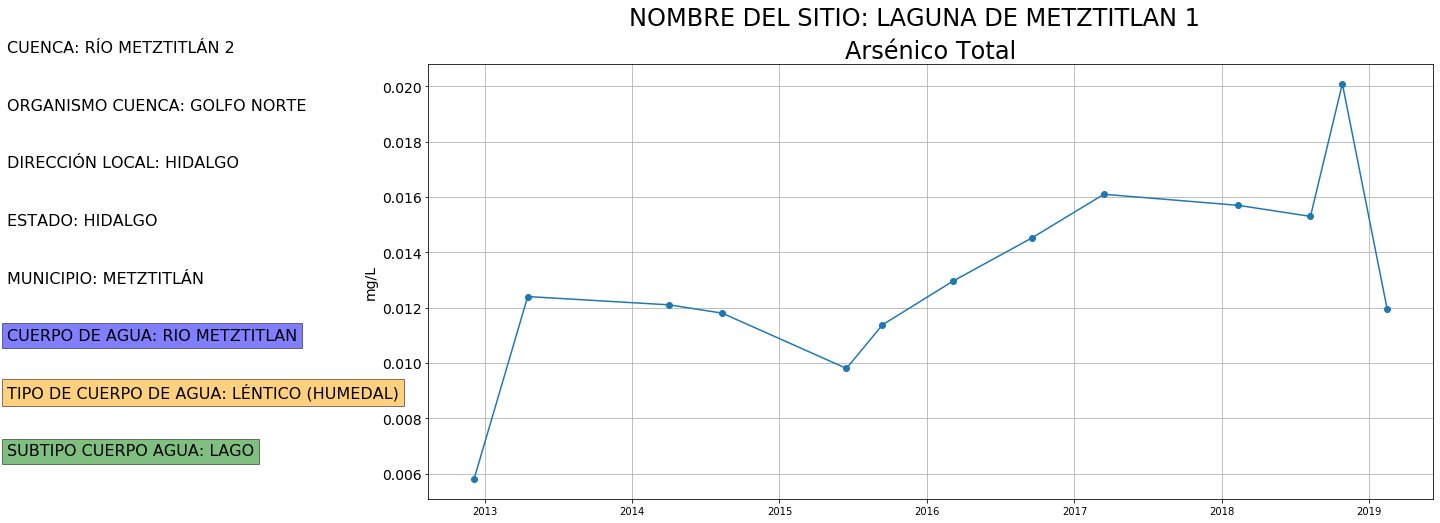

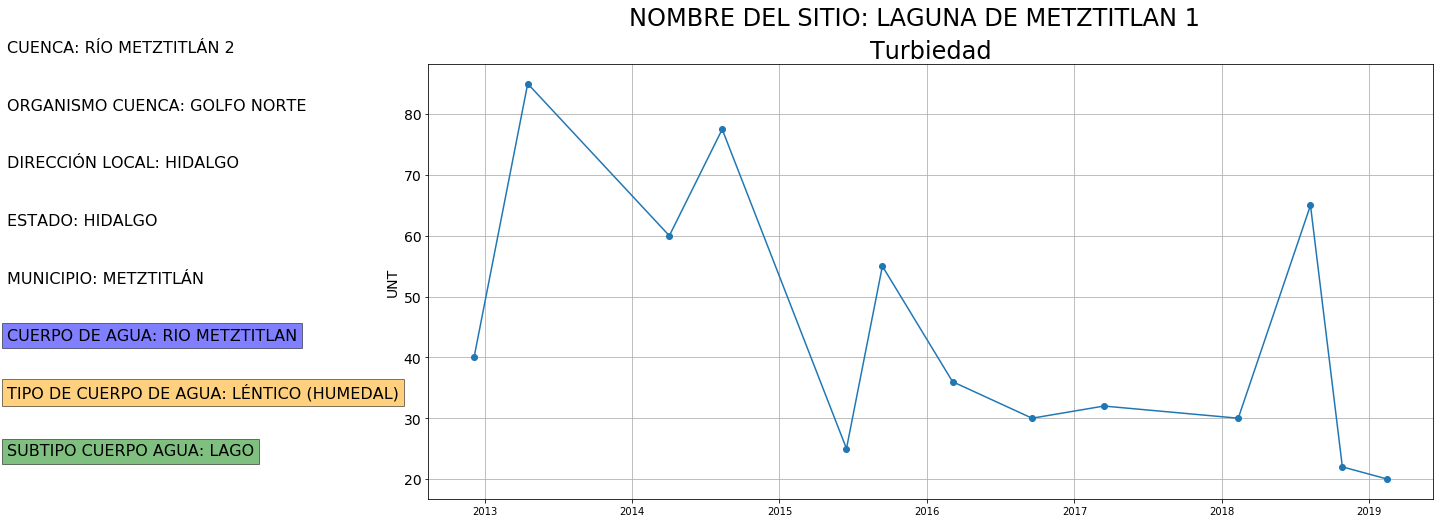

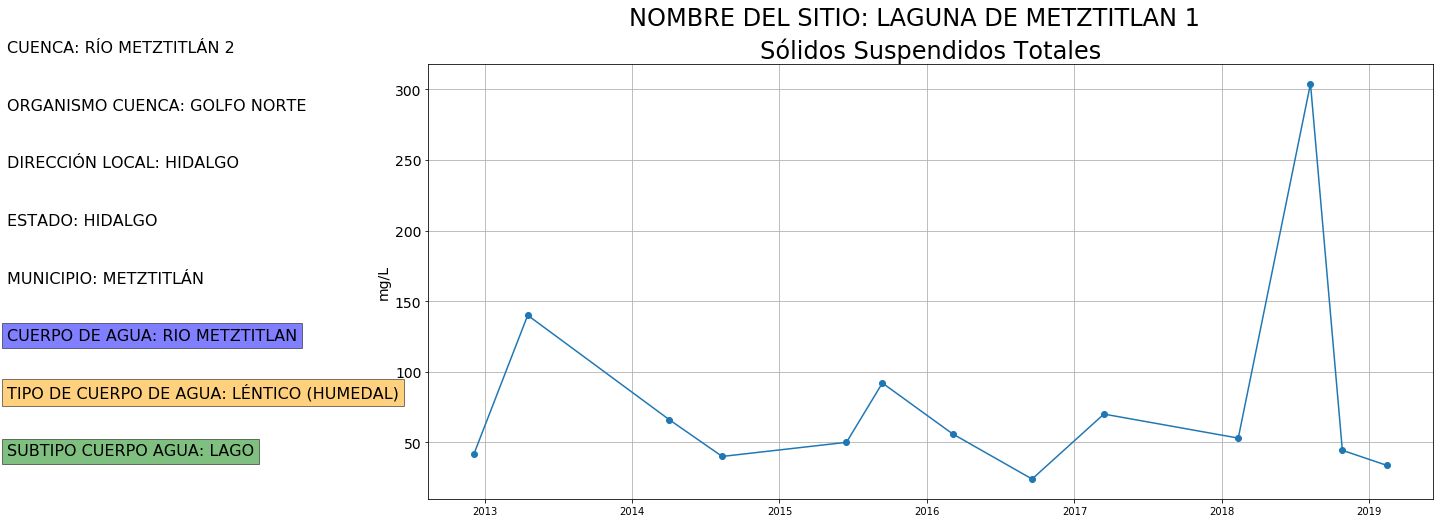

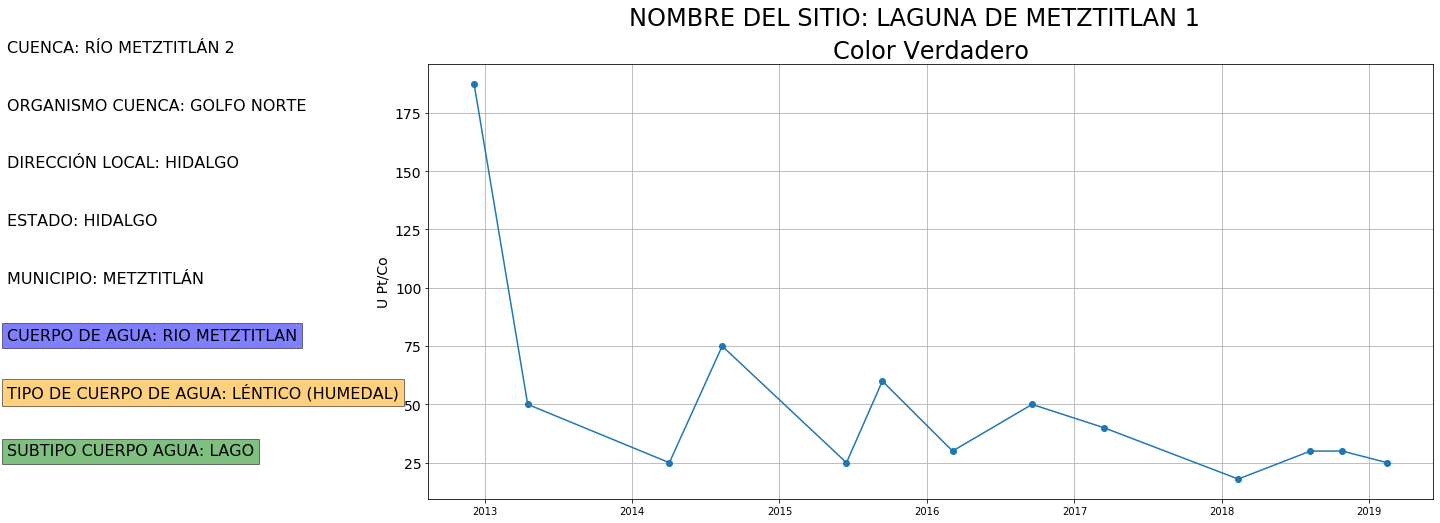

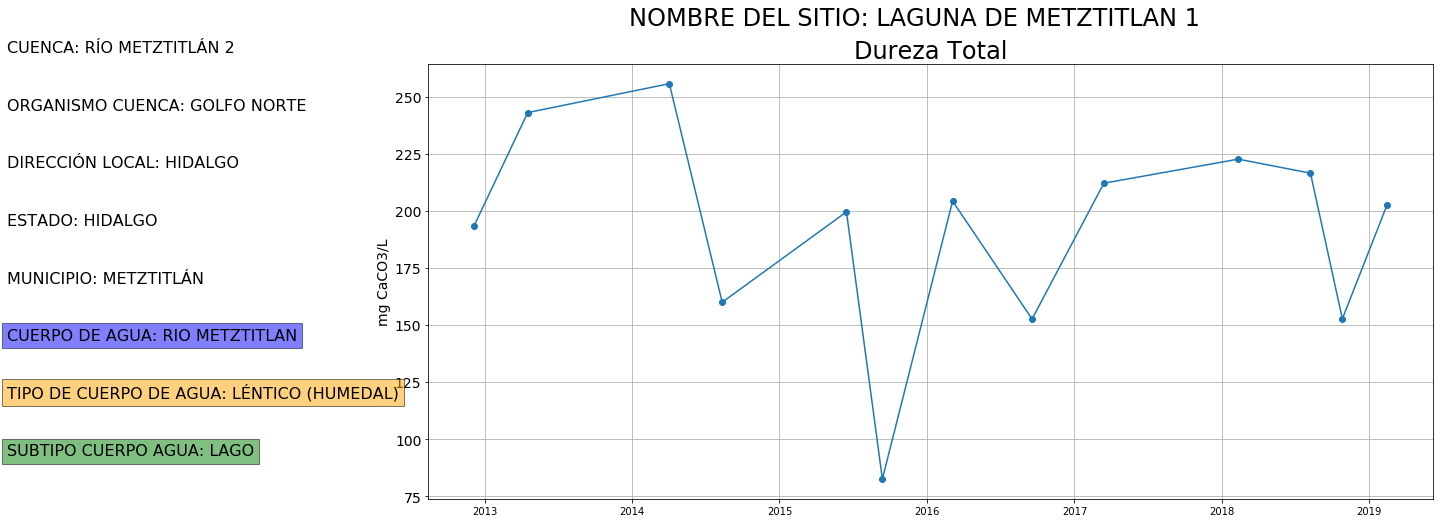

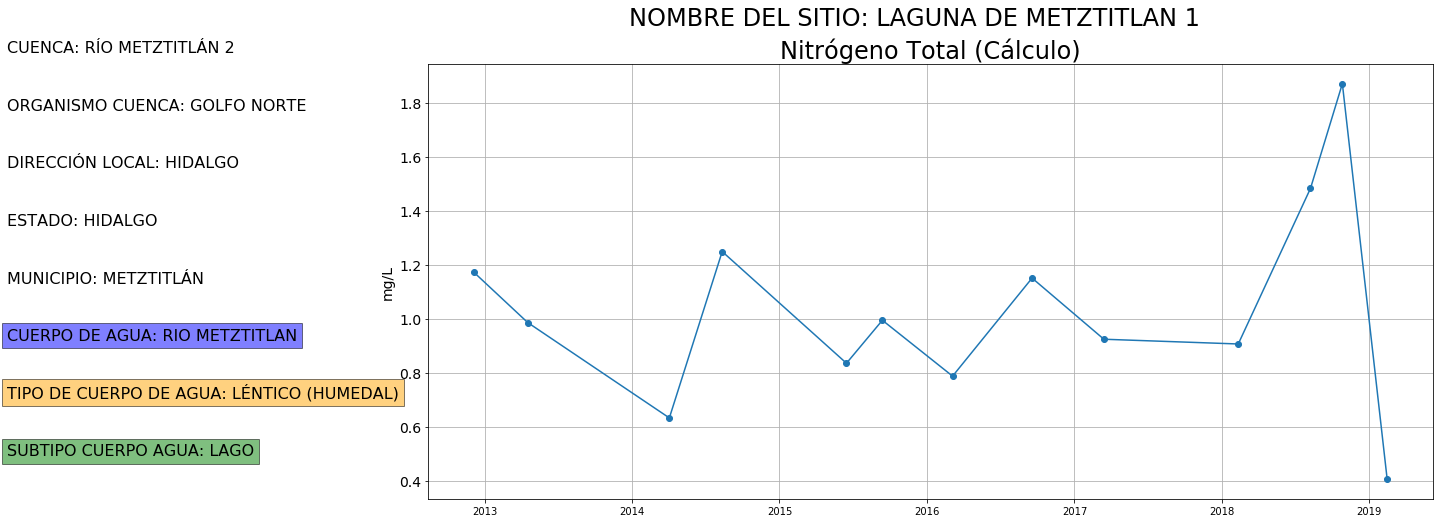

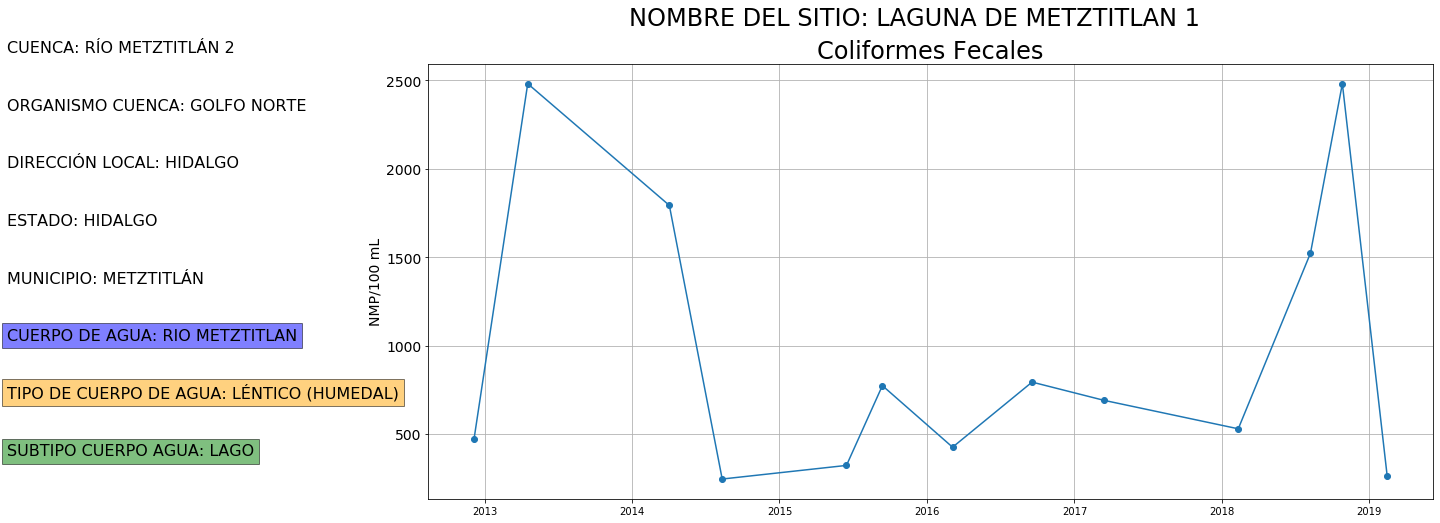

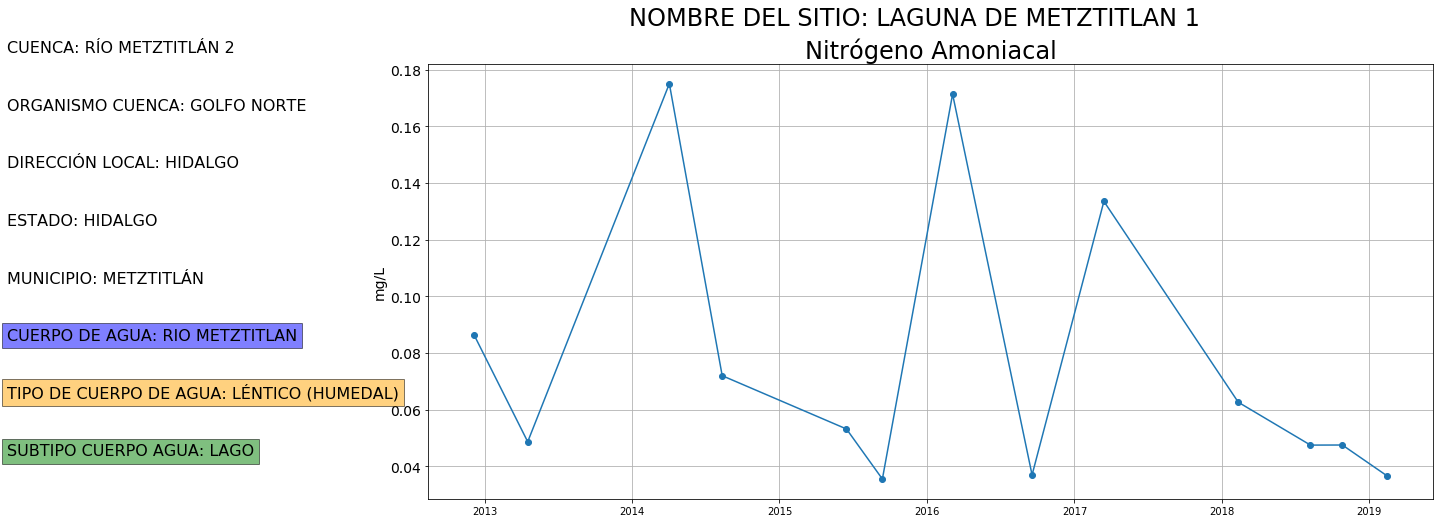

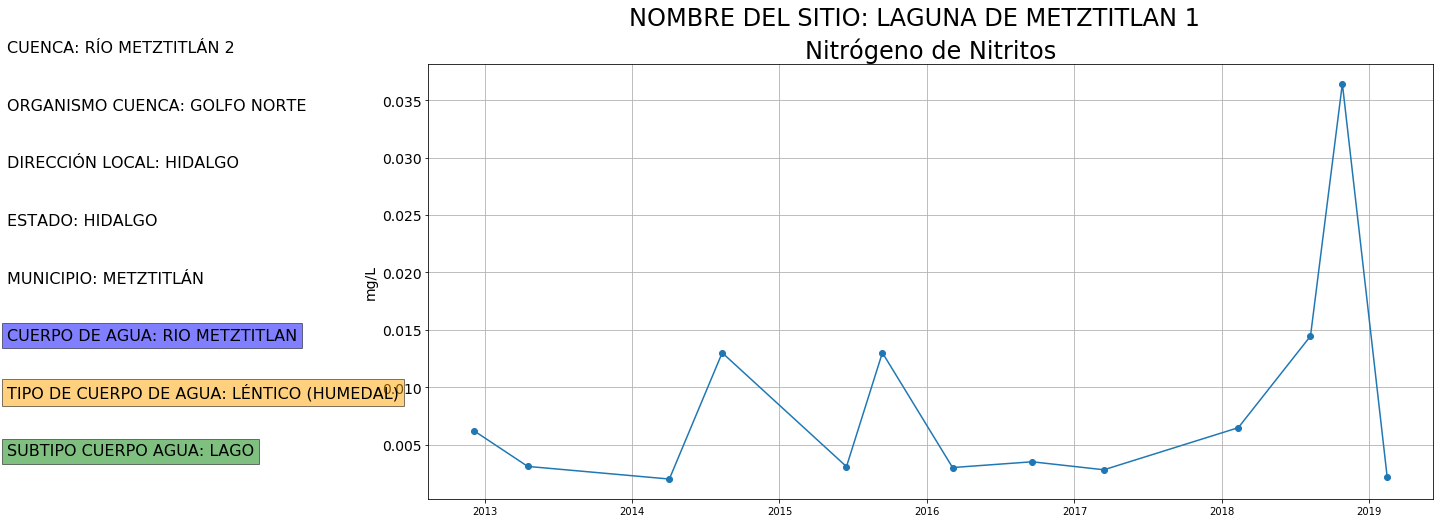

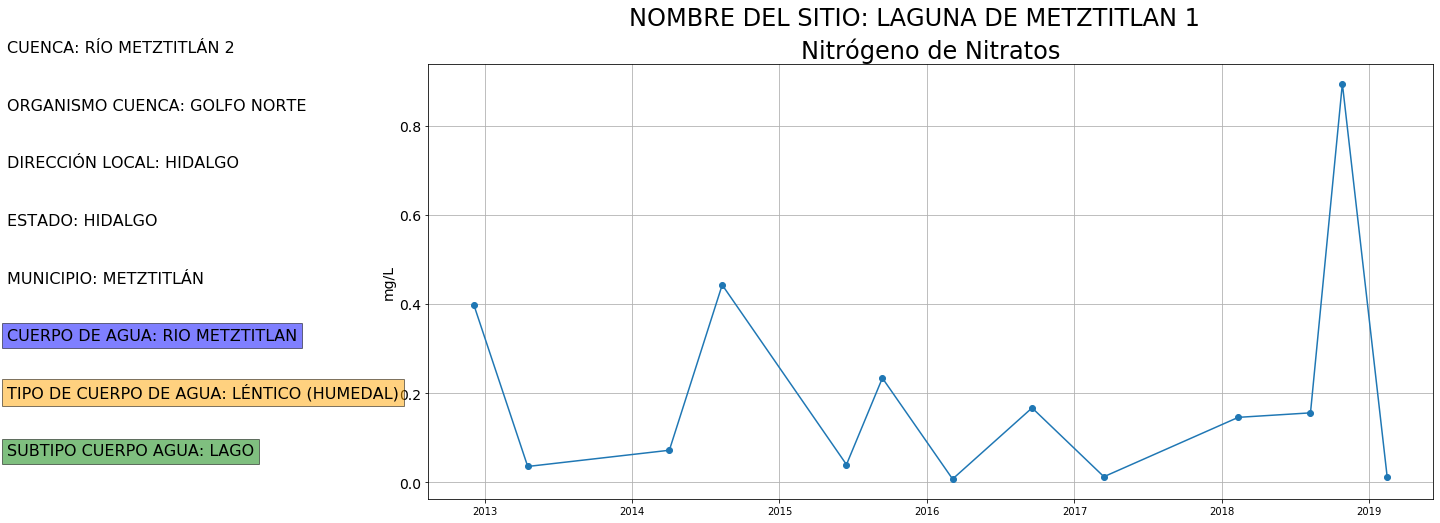

In [9]:
for i in range (0,3):#index of sitios
    df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]
    nombre_sitio = df_Metztitlan["NOMBRE DEL SITIO"].array[i]
    index_namecols = df_Metztitlan.iloc[:,:]
    subtitulo = index_namecols.columns[1]+': '+nombre_sitio
    subtitulo_2 = index_namecols.columns[2]+': '+index_namecols.iloc[0+i,2]
    subtitulo_5 = index_namecols.columns[5]+': '+index_namecols.iloc[0+i,5]
    subtitulo_6 = index_namecols.columns[6]+': '+index_namecols.iloc[0+i,6]
    subtitulo_7 = index_namecols.columns[7]+': '+index_namecols.iloc[0+i,7]
    subtitulo_8 = index_namecols.columns[8]+': '+index_namecols.iloc[0+i,8]
    subtitulo_9 = index_namecols.columns[9]+': '+index_namecols.iloc[0+i,9]
    subtitulo_10 = index_namecols.columns[10]+': '+index_namecols.iloc[0+i,10]
    subtitulo_11 = index_namecols.columns[11]+': '+index_namecols.iloc[0+i,11]
    
    
    for j in range(len(cols)):#index of cols variable
    #for j in range(5,6):
        df_rows = df_eti[df_eti['CLAVE PARÁMETRO'] == cols[j]]
        titulo = df_rows['NOMBRE DEL PARÁMETRO']
        titulo = df_rows.iloc[0,1]
        
        
        df_res_full[cols[j]] = pd.to_numeric(df_res_full[cols[j]].interpolate(method='linear', axis=0, limit_direction='both', limit=8), downcast="float",errors='coerce')
        #df_res_full[cols[j]].interpolate(method='linear', axis=0, limit_direction='both', limit=8)
        #df_res_2019[cols[j]] = pd.to_numeric(df_res_2019[cols[j]], downcast="float",errors='coerce')
        df_cuerpo_de_agua = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]        

        key_array_df = df_cuerpo_de_agua["CLAVE SITIO"].array[i]
        
        #Data 2012-2018
        serie_2018 = df_res_2018[df_res_2018["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        serie_2018_full = df_res_full[df_res_full["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        #serie_2018_full[cols[j]].replace('\< | \>', '')
               
        
        #Data 2019
        serie_2019 = df_res_2019[df_res_2019["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        #serie_2019[cols[j]].replace('\< | \>', '')
        #serie_2019[cols[j]]#.dropna()
        
        if ((serie_2018[cols[j]].dropna().shape[0]+serie_2019[cols[j]].dropna().shape[0])>=10):
            
            rcParams['figure.figsize'] = 18, 8
            
            plt.figure()
            plt.title(titulo, fontsize=24)
            plt.suptitle(subtitulo, fontsize=24)
            
            plt.figtext(-0.2, 0.9, subtitulo_2, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.8, subtitulo_5, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.7, subtitulo_6, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.6, subtitulo_7, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.5, subtitulo_8, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.4, subtitulo_9, ha="left", fontsize=16, bbox={"facecolor":"blue", "alpha":0.5, "pad":5})
            plt.figtext(-0.2, 0.3, subtitulo_10, ha="left", fontsize=16, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
            plt.figtext(-0.2, 0.2, subtitulo_11, ha="left", fontsize=16, bbox={"facecolor":"green", "alpha":0.5, "pad":5})

            
            plt.plot(serie_2018_full['FECHA'], serie_2018_full[cols[j]], '-o')
            #plt.plot(serie_2019['FECHA'], serie_2019[cols[j]], '-o')
            #plt.xticks(np.arange(0, serie.shape[0], step=serie.shape[0]/6), fontsize=14) #Numberlines, nnumberlines/6
            plt.yticks(fontsize=14)
            plt.ylabel(df_rows.iloc[0,2], fontsize=14)
            
            plt.grid()
            plt.rcParams.update({'figure.max_open_warning': 0})